**Inclass: Data Wrangling and Visualization**
- Part 3 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: August 2024
___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

## Training Objectives

![](assets/dwv_mindmap.png)

- _Python Reproducible Environment_
- _Working with Multi-Index DataFrames_
- _Reshaping DataFrame_
- _Visual Data Exploratory_
- _Using Group By Effectively_

----

# Refresher: P4DA (Week 1) and EDA (Week 2)

2 minggu sebelumnya, kita sudah mempelajari fungsi-fungsi untuk melakukan inspeksi awal dan analisis lanjut pada data:

**_Python for Data Analyst: Data Inspection_**
- `.head()` dan `.tail()`: menampilkan data teratas dan data terbawah.
- `.describe()`: menampilkan nilai statistik pada data.
- `.shape` and `.size`: menampilkan ukuran data.
- `.axes`: menampilkan nama baris/indeks dan kolom.
- `.dtypes`: menampilkan tipe data setiap kolom.
- `.loc` dan `.iloc`: melakukan _indexing/subsetting/slicing_.

**_Exploraroty Data Analysis: Diagnostic and Exploratory_**
- _Tables_.
- _Cross-Tables and Aggregates_.
- _Using `aggfunc` for Aggregate Functions_.
- _Pivot Tables_.
- _Working with DateTime_.
- _Working with Categorical Data_.
- _Duplicates and Missing Value Treatment_.

---

# Python Reproducible Environment


<center>
<img src="assets/venv.webp" width=60%/>
</center>

Pada awal pembelajaran P4DA, kita sudah berkenalan dengan istilah ***virtual environment***.

> ***Virtual environment*** adalah *environment* terisolasi yang memungkinkan setiap *environment* memiliki instalasi dan versi *package* yang khusus dan berbeda. 

Kita bisa menggunakan *virtual environment* saat memiliki banyak projek di mana setiap projek membutuhkan *library* dengan versi yang spesifik. Dengan menggunakan *virtual environment*, kita bisa menjalankan berbagai macam projek pada satu *device* yang sama tanpa perlu khawatir akan adanya permasalahan yang timbul karena perbedaan versi *library*.

## ✨Importing Requirements✨

Anda adalah seorang *data scientist* pada sebuah perusahaan reksadana. Anda sedang memulai sebuah projek analisis saham di *device*-nya dan membuat *virtual environment* khusus untuk projek tersebut. Ia juga melakukan instalasi berbagai *library* yang digunakan untuk projek tersebut.

> ❓ Anda ingin membagikan proyek analisis data tersebut kepada rekan-rekan kerja anda. Bagaimana cara projek tersebut dapat berjalan di *device* rekan anda tanpa menimbulkan *error*?

> 💡 Anda dapat membuat *file* ✨`requirements.txt`✨ yang berisikan daftar *library* yang sudah ter-*install* di-*environment*-nya dan menyerahkan *file* tersebut kepada rekan anda.

Lihat pada folder `/material_3_dwv_main`, anda akan menemukan *file* `requirements.txt` yang isinya seperti ini:

```batch
matplotlib==3.9.1
numpy==1.26.4
pandas==2.2.2
seaborn==0.13.2
yfinance==0.2.40
```

Setelah mendapatkan *file* `requirements.txt`, rekan anda dapat melakukan langkah berikut.

1. Buka terminal pada VS Code.

2. Aktifkan *environment* yang ingin digunakan.
    ```batch
    conda activate <ENV_NAME>
    ```

3. Instalasi seluruh *library* yang terdapat pada `requirements.txt`.
    ```batch
    pip install -r requirements.txt
    ```

## ✨Exporting Requirements✨

Untuk membuat `requirements.txt`, kita dapat melakukan langkah-langkah berikut:

1. Buka terminal pada VS Code

2. Aktifkan *environment*.
    ```batch
    conda activate <ENV_NAME>
    ```

3. *Export environment*: membuat daftar *library* beserta versinya.
    ```batch
    pip list --format=freeze > requirements.txt
    ```


>💡 **Note**: Anda dapat menyimpan *file* dengan nama lain, namun nama yang umum digunakan adalah `requirements.txt`.

---

# Working with Multi-Index DataFrames

Pada pembelajaran kali ini, kita akan menggunakan *library* `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/markets/). Penarikan data menggunakan _library_ `yfinance` membutuhkan koneksi internet.

> 📌 Dokumentasi *library* `yfinance`: https://pypi.org/project/yfinance/

In [1]:
# package untuk manipulasi data
import pandas as pd
# package untuk import data
import yfinance
# package untuk visualisasi data
import matplotlib.pyplot as plt

# atur format angka untuk float
pd.options.display.float_format = '{:,.2f}'.format

import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# perusahaan yang akan ditarik datanya: BRI, Adaro, Telkom
symbol = ['BBRI.JK', 'ADRO.JK', 'TLKM.JK']

# range tanggal untuk mengambil data saham
start_date = '2021-01-01' 
end_date = '2023-12-31'

# penarikan data
stock = yfinance.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']

# 5 record teratas
stock.head(10)

[*********************100%%**********************]  3 of 3 completed


Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   
2021-01-11    926.54 3,545.96 2,990.04 1,525.00 4,227.20 3,600.00 1,540.00   
2021-01-12    896.16 3,599.34 2,915.29 1,475.00 4,290.83 3,510.00 1,535.00   
2021-01-13    920.47 3,652.72 2,890.37 1,515.00 4,354.47 3,480.00 1,540.00   
2021-01-14    908.32 3,637.47 2,906.98 1,495.00 4,336.29 3,500.00 1,535.00   
2021-01-15    884.01 3,492.58 2,890.37 1,455.00 4,163.56 3,480.00 1,495.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   
2021-01-11 4,236.29 3,640.00 1,470.00 4,009.02 3,570.00 1,490.00 4,018.11   
2021-01-12 4,336.29 3,620.00 1,470.00 4,245.38 3,500.00 1,530.00 4,254.47   
2021-01-13 4,399.92 3,550.00 1,490.00 4,318.11 3,460.00 1,530.00 4,336.29   
2021-01-14 4,390.83 3,590.00 1,490.00 4,290.83 3,470.00 1,525.00 4,381.74   
2021-01-15 4,336.29 3,540.00 1,450.00 4,136.29 3,450.00 1,495.00 4,336.29   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700  
2021-01-11 3,590.00  278542900  422093240  271231200  
2021-01-12 3,600.00  183107400  260390447  189779500  
2021-01-13 3,550.00  204773900  231181533  162329300  
2021-01-14 3,480.00  105347800  146980798  187448400  
2021-01-15 3,510.00   86423600  225189839  133304300

**Penjelasan `Symbols`:**

- `ADRO.JK`: PT Adaro Energy Indonesia Tbk.
- `BBRI.JK`: PT Bank Rakyat Indonesia Tbk.
- `TLKM.JK`: PT Telkom Indonesia Tbk.

**Deskripsi Data:**

- `Date`: tanggal dalam format `yyyy-mm-dd`.
- `High`: nilai saham **tertinggi** di hari tersebut.
- `Low`: nilai saham **terendah** di hari tersebut.
- `Open`: nilai saham saat **_trading hours_ dibuka** di hari tersebut.
- `Close`: nilai saham saat **_trading hours_ ditutup** di hari tersebut.
- `Adj Close`: nilai `Close` yang telah disesuaikan _stock split_ dan pembagian dividen. 
- `Volume`: jumlah lembar saham yang berpindah tangan di hari tersebut (jumlah transaksi jual beli).

## ✨Saving DataFrame to File✨

Sebelumnya, kita sudah mempelajari bagaimana cara membaca data yang berformat `.csv` menggunakan fungsi `pd.read_csv()`. 

> 📌 **Method 1** : Menggunakan fungsi `.to_csv()` untuk data yang berformat `.csv`.

In [3]:
# simpan data format CSV ke folder data_cache
stock.to_csv('data_cache/stock.csv')

In [4]:
# read data
pd.read_csv('data_cache/stock.csv', header=[0, 1])

Attributes Adj Close                      Close                    \
        Symbols   ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK   
0          Date       NaN      NaN      NaN      NaN      NaN      NaN   
1    2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00   
2    2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00   
3    2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00   
4    2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00   
..          ...       ...      ...      ...      ...      ...      ...   
728  2023-12-21  2,223.55 5,291.50 3,722.55 2,600.00 5,575.00 3,950.00   
729  2023-12-22  2,215.00 5,386.41 3,731.98 2,590.00 5,675.00 3,960.00   
730  2023-12-27  2,215.00 5,338.95 3,713.13 2,590.00 5,625.00 3,940.00   
731  2023-12-28  2,206.44 5,433.87 3,731.98 2,580.00 5,725.00 3,960.00   
732  2023-12-29  2,206.43 5,433.87 3,722.55 2,380.00 5,725.00 3,950.00   

        High                        Low                       Open           \
     ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1   1,460.00 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2   1,470.00 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
3   1,420.00 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
4   1,430.00 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
..       ...      ...      ...      ...      ...      ...      ...      ...   
728 2,610.00 5,600.00 3,970.00 2,570.00 5,525.00 3,930.00 2,580.00 5,550.00   
729 2,610.00 5,700.00 3,980.00 2,580.00 5,600.00 3,950.00 2,600.00 5,650.00   
730 2,630.00 5,725.00 4,000.00 2,580.00 5,625.00 3,920.00 2,600.00 5,700.00   
731 2,610.00 5,750.00 3,970.00 2,560.00 5,675.00 3,940.00 2,600.00 5,700.00   
732 2,430.00 5,750.00 3,980.00 2,370.00 5,675.00 3,940.00 2,410.00 5,750.00   

                     Volume                                
     TLKM.JK        ADRO.JK        BBRI.JK        TLKM.JK  
0        NaN            NaN            NaN            NaN  
1   3,320.00 110,366,200.00 106,226,854.00 165,339,800.00  
2   3,480.00 107,023,500.00 106,964,857.00 157,800,700.00  
3   3,470.00 203,948,800.00 128,299,616.00 177,877,900.00  
4   3,390.00 204,243,100.00 141,798,389.00 140,221,900.00  
..       ...            ...            ...            ...  
728 3,960.00  34,194,600.00  99,049,600.00  48,242,100.00  
729 3,980.00  29,264,900.00 109,411,300.00  28,222,700.00  
730 3,990.00  57,605,200.00 122,236,700.00  73,157,200.00  
731 3,960.00  84,319,700.00 121,434,600.00  34,024,400.00  
732 3,960.00 124,776,700.00  93,126,000.00  27,497,600.00  

[733 rows x 19 columns]

Ternyata struktur data menjadi tidak rapi setelah disimpan ke format `.csv` dan dipanggil kembali. Untuk mengatasi hal ini, kita bisa menyimpan *dataframe* menggunakan `pickle`.

> 📌 **Method 2** : menyimpan suatu objek Python ke sebuah file **Pickle**.

**🔎 Langkah-Langkah *Pickling***

1. Menyimpan data dengan fungsi `.to_pickle()`.
2. Membaca data dengan fungsi `pd.read_pickle()`.

In [5]:
# simpan pickle ke folder data_cache
stock.to_pickle('data_cache/stock.pickle')

In [6]:
# read pickle
pd.read_pickle('data_cache/stock.pickle')

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   
...              ...      ...      ...      ...      ...      ...      ...   
2023-12-21  2,223.55 5,291.50 3,722.55 2,600.00 5,575.00 3,950.00 2,610.00   
2023-12-22  2,215.00 5,386.41 3,731.98 2,590.00 5,675.00 3,960.00 2,610.00   
2023-12-27  2,215.00 5,338.95 3,713.13 2,590.00 5,625.00 3,940.00 2,630.00   
2023-12-28  2,206.44 5,433.87 3,731.98 2,580.00 5,725.00 3,960.00 2,610.00   
2023-12-29  2,206.43 5,433.87 3,722.55 2,380.00 5,725.00 3,950.00 2,430.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-21 5,600.00 3,970.00 2,570.00 5,525.00 3,930.00 2,580.00 5,550.00   
2023-12-22 5,700.00 3,980.00 2,580.00 5,600.00 3,950.00 2,600.00 5,650.00   
2023-12-27 5,725.00 4,000.00 2,580.00 5,625.00 3,920.00 2,600.00 5,700.00   
2023-12-28 5,750.00 3,970.00 2,560.00 5,675.00 3,940.00 2,600.00 5,700.00   
2023-12-29 5,750.00 3,980.00 2,370.00 5,675.00 3,940.00 2,410.00 5,750.00   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700  
...             ...        ...        ...        ...  
2023-12-21 3,960.00   34194600   99049600   48242100  
2023-12-22 3,980.00   29264900  109411300   28222700  
2023-12-27 3,990.00   57605200  122236700   73157200  
2023-12-28 3,960.00   84319700  121434600   34024400  
2023-12-29 3,960.00  124776700   93126000   27497600  

[732 rows x 18 columns]

**Pickle** juga membantu kita untuk mempertahankan tipe data dari setiap kolom pada _dataframe_.

In [7]:
# membuat employee data lalu konversi tipe data
employee = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'blood_type': ['O', 'A', 'B', 'AB', 'B', 'B', 'O'],
    'join_date': ['28 Jun 2021', '29 Jun 2021', '30 Jun 2021', '1 Jul 2021', '2 Jul 2021', '3 Jul 2021', '4 Jul 2021']
})

# ubah tipe data
employee[['gender', 'blood_type']] = employee[['gender', 'blood_type']].astype('category')
employee['join_date'] = employee['join_date'].astype('datetime64[ns]')
employee.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

Kita akan mencoba untuk menyimpan dalam format `.csv`.

In [8]:
# simpan ke file csv
employee.to_csv('data_cache/employee.csv', index=False)

# baca dari csv dan cek tipe data
employee_csv = pd.read_csv('data_cache/employee.csv')
employee_csv.dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

> Terlihat bahwa tipe data dari kolom `gender`, `blood_type`, dan `join_date` terdeteksi sebagai `object`.

Kita akan mencoba untuk menyimpan dalam format `.pickle`.

In [9]:
# simpan object dummy ke file pickle
employee.to_pickle('data_cache/employee.pickle')

# baca dari pickle dan cek tipe data
employee_pickle = pd.read_pickle('data_cache/employee.pickle')
employee_pickle.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

> Tipe data sebelum data disimpan dan setelah data disimpan adalah sama.

**⚠️*Pros & Cons Pickle File***

Kelebihan:
- Mempertahankan struktur dari _dataframe_.
- Mempertahankan tipe data dari _dataframe_.

Kekurangan:
- Hanya bisa dibaca dengan Python dan tidak bisa langsung diakses dengan _double click_.
- _Pickle_ dari sumber yang tidak terpercaya dapat digunakan untuk menyebarkan _malware_.

## ✨Slicing Multi-Index DataFrame✨

Mari kita lihat kembali data `stock` sebelumnya.

In [10]:
stock.tail()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2023-12-21  2,223.55 5,291.50 3,722.55 2,600.00 5,575.00 3,950.00 2,610.00   
2023-12-22  2,215.00 5,386.41 3,731.98 2,590.00 5,675.00 3,960.00 2,610.00   
2023-12-27  2,215.00 5,338.95 3,713.13 2,590.00 5,625.00 3,940.00 2,630.00   
2023-12-28  2,206.44 5,433.87 3,731.98 2,580.00 5,725.00 3,960.00 2,610.00   
2023-12-29  2,206.43 5,433.87 3,722.55 2,380.00 5,725.00 3,950.00 2,430.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2023-12-21 5,600.00 3,970.00 2,570.00 5,525.00 3,930.00 2,580.00 5,550.00   
2023-12-22 5,700.00 3,980.00 2,580.00 5,600.00 3,950.00 2,600.00 5,650.00   
2023-12-27 5,725.00 4,000.00 2,580.00 5,625.00 3,920.00 2,600.00 5,700.00   
2023-12-28 5,750.00 3,970.00 2,560.00 5,675.00 3,940.00 2,600.00 5,700.00   
2023-12-29 5,750.00 3,980.00 2,370.00 5,675.00 3,940.00 2,410.00 5,750.00   

Attributes              Volume                       
Symbols     TLKM.JK    ADRO.JK    BBRI.JK   TLKM.JK  
Date                                                 
2023-12-21 3,960.00   34194600   99049600  48242100  
2023-12-22 3,980.00   29264900  109411300  28222700  
2023-12-27 3,990.00   57605200  122236700  73157200  
2023-12-28 3,960.00   84319700  121434600  34024400  
2023-12-29 3,960.00  124776700   93126000  27497600

Perhatikan bahwa kolom pada data `stock` memiliki susunan kolom yang berbeda dari yang sudah kita pelajari di minggu-minggu sebelumnya. `stock` memiliki kolom yang terdiri dari 2 level:

1. Level pertama (level 0): menunjukkan `Attributes`.
2. Level kedua (level 1): menunjukkan `Symbols`.

Data seperti ini disebut dengan ***multi-index dataframe***.

> 📌 ***Multi-index dataframe*** adalah *dataframe* yang memiliki >1 level indeks baris dan/atau level indeks kolom.

> ❓ Perusahaan ingin menganalisis data harga saham BRI, Adaro, dan Telkom saat *trading hours* ditutup (`Close`). Bagaimana cara melakukan *slicing* dari data yang ada?

In [11]:
stock.head(5)

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700

In [12]:
# subsetting dengan []
stock['Close']

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2021-01-04,"1,455.00","3,918.11","3,490.00"
2021-01-05,"1,425.00","3,881.75","3,470.00"
2021-01-06,"1,375.00","3,818.12","3,370.00"
2021-01-07,"1,405.00","3,890.84","3,390.00"
2021-01-08,"1,445.00","3,990.84","3,570.00"
...,...,...,...
2023-12-21,"2,600.00","5,575.00","3,950.00"
2023-12-22,"2,590.00","5,675.00","3,960.00"
2023-12-27,"2,590.00","5,625.00","3,940.00"


> ❓ Perusahaan hanya ingin menganalisis harga saham BRI saat `Close`. Bagaimana cara mengambil detail `Close` untuk BRI saja?

In [13]:
# subsetting dengan []
stock['Close']['BBRI.JK']

Date
2021-01-04   3,918.11
2021-01-05   3,881.75
2021-01-06   3,818.12
2021-01-07   3,890.84
2021-01-08   3,990.84
               ...   
2023-12-21   5,575.00
2023-12-22   5,675.00
2023-12-27   5,625.00
2023-12-28   5,725.00
2023-12-29   5,725.00
Name: BBRI.JK, Length: 732, dtype: float64

> ❓ Sekarang, perusahaan ingin menganalisis semua *attribute* untuk BRI, mulai dari `Adj.Close` hingga `Volume`. Bagaimana cara menampilkan seluruh attribute dari saham BRI?

In [14]:
# coba subsetting dengan []
# stock['BBRI.JK']

Kita akan mendapatkan _error_ seperti di atas. _Subsetting_ menggunakan kurung siku (`[ ]`) bisa kita gunakan untuk level paling atas, yakni `Attributes`. `BBRI.JK` berada di level di bawahnya, yaitu `Symbols`. Untuk menyelesaikan permasalahan tersebut, kita akan menggunakan **_cross section_**.

> 📌Kita dapat menggunakan fungsi `.xs()` untuk melakukan _cross section_.

**🔎 Parameter Penting Fungsi `.xs()`**

* `key`: label apa yang akan dicari.
* `level`: label tersebut berada di level apa/berapa.
* `axis`: level berada di baris (`axis = 0`) atau di kolom (`axis = 1`).
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html).

In [15]:
stock.head()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700

In [16]:
# mengambil semua attributes untuk BBRI.JK dengan .xs()
stock.xs(key = 'BBRI.JK',
         level = 'Symbols',
         axis = 1) # BRI letaknya di kolom (jika di baris, gunakan axis = 0)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,"3,286.69","3,918.11","3,927.20","3,772.66","3,772.66",106226854
2021-01-05,"3,256.18","3,881.75","3,909.02","3,854.48","3,909.02",106964857
2021-01-06,"3,202.80","3,818.12","3,909.02","3,781.75","3,890.84",128299616
2021-01-07,"3,263.81","3,890.84","3,899.93","3,827.21","3,872.66",141798389
2021-01-08,"3,347.69","3,990.84","3,990.84","3,909.02","3,936.30",205011531
...,...,...,...,...,...,...
2023-12-21,"5,291.50","5,575.00","5,600.00","5,525.00","5,550.00",99049600
2023-12-22,"5,386.41","5,675.00","5,700.00","5,600.00","5,650.00",109411300
2023-12-27,"5,338.95","5,625.00","5,725.00","5,625.00","5,700.00",122236700


### 🧪 Knowledge Check: `.xs()` for Cross Section

❓ Perusahaan ingin mencari nilai `High`, `Close`, dan `Volume` dari saham Telkom pada tanggal 31 Oktober 2023. 

***Hint***: Gunakan `.loc[]` setelah melakukan cross-section.

Syntax = `df.loc[ Baris , Kolom ]`

In [17]:
# code here
stock.xs(
    key= 'TLKM.JK',
    level = 'Symbols',
    axis = 1
).loc['2023-10-31' , ['High','Close','Volume']]

Attributes
High          3,510.00
Close         3,490.00
Volume   66,801,600.00
Name: 2023-10-31 00:00:00, dtype: float64

---

# Reshaping DataFrame

_Reshaping_ data adalah salah satu komponen penting dalam tahap _data wrangling_. _Reshaping_ memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisis data berikutnya. Dalam hal ini, *reshaping* sering dilakukan sebelum visualisasi data. Fungsi-fungsi untuk _reshaping_ yang akan kita pelajari pada _course_ ini:

- `.stack()`.
- `.unstack()`.
- `.melt()`.
- `.pivot()`.

## ✨`.stack()`✨  

<center>
<img src="assets/stack.png" width=60%/>
</center>

`.stack()` digunakan untuk **memindahkan level pada kolom menjadi level pada baris**.

**🔎 Parameter Penting Fungsi `.stack()`**

* `level`: nama level/indeks level pada kolom yang akan dipindahkan.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html).

In [18]:
# stock sebelum di-stack
stock.head()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700

In [19]:
# stock setelah di-stack
stacked_stock = stock.stack()
stacked_stock

Attributes          Adj Close    Close     High      Low     Open     Volume
Date       Symbols                                                          
2021-01-04 ADRO.JK     884.01 1,455.00 1,460.00 1,360.00 1,430.00  110366200
           BBRI.JK   3,286.69 3,918.11 3,927.20 3,772.66 3,772.66  106226854
           TLKM.JK   2,898.68 3,490.00 3,500.00 3,310.00 3,320.00  165339800
2021-01-05 ADRO.JK     865.79 1,425.00 1,470.00 1,420.00 1,455.00  107023500
           BBRI.JK   3,256.18 3,881.75 3,909.02 3,854.48 3,909.02  106964857
...                       ...      ...      ...      ...      ...        ...
2023-12-28 BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,700.00  121434600
           TLKM.JK   3,731.98 3,960.00 3,970.00 3,940.00 3,960.00   34024400
2023-12-29 ADRO.JK   2,206.43 2,380.00 2,430.00 2,370.00 2,410.00  124776700
           BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,750.00   93126000
           TLKM.JK   3,722.55 3,950.00 3,980.00 3,940.00 3,960.00   27497600

[2196 rows x 6 columns]

Perhatikan bahwa:

* Secara default, `.stack()` akan memindahkan level terbawah dari kolom menjadi level terkanan dari baris
* Sebelum _stacking_, _index_ pada baris hanya berupa tanggal: `Date`.
* Setelah _stacking_, _index_ pada baris bertambah menjadi tanggal dan simbol perusahaan: `Date` dan `Symbols`.

> ❓ Bagaimana cara agar `Attributes` yang dipindahkan menjadi baris?

In [20]:
# memindahkan level Attributes menjadi level pada baris
stock.stack(level='Attributes')

Symbols                      ADRO.JK       BBRI.JK       TLKM.JK
Date       Attributes                                           
2021-01-04 Adj Close          884.01      3,286.69      2,898.68
           Close            1,455.00      3,918.11      3,490.00
           High             1,460.00      3,927.20      3,500.00
           Low              1,360.00      3,772.66      3,310.00
           Open             1,430.00      3,772.66      3,320.00
...                              ...           ...           ...
2023-12-29 Close            2,380.00      5,725.00      3,950.00
           High             2,430.00      5,750.00      3,980.00
           Low              2,370.00      5,675.00      3,940.00
           Open             2,410.00      5,750.00      3,960.00
           Volume     124,776,700.00 93,126,000.00 27,497,600.00

[4392 rows x 3 columns]

## ✨`.unstack()`✨

<center>
<img src="assets/unstack.png" width=60%/>
</center>

`.unstack()` digunakan untuk **memindahkan level pada baris menjadi level pada kolom**. Kebalikan dari `.stack()`.

**🔎 Parameter Penting Fungsi `.unstack()`**

* `level`: nama level/indeks level pada baris yang akan dipindahkan.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html).

In [21]:
stacked_stock.head()

Attributes          Adj Close    Close     High      Low     Open     Volume
Date       Symbols                                                          
2021-01-04 ADRO.JK     884.01 1,455.00 1,460.00 1,360.00 1,430.00  110366200
           BBRI.JK   3,286.69 3,918.11 3,927.20 3,772.66 3,772.66  106226854
           TLKM.JK   2,898.68 3,490.00 3,500.00 3,310.00 3,320.00  165339800
2021-01-05 ADRO.JK     865.79 1,425.00 1,470.00 1,420.00 1,455.00  107023500
           BBRI.JK   3,256.18 3,881.75 3,909.02 3,854.48 3,909.02  106964857

In [22]:
# unstack stacked_stock
stacked_stock.unstack()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   
...              ...      ...      ...      ...      ...      ...      ...   
2023-12-21  2,223.55 5,291.50 3,722.55 2,600.00 5,575.00 3,950.00 2,610.00   
2023-12-22  2,215.00 5,386.41 3,731.98 2,590.00 5,675.00 3,960.00 2,610.00   
2023-12-27  2,215.00 5,338.95 3,713.13 2,590.00 5,625.00 3,940.00 2,630.00   
2023-12-28  2,206.44 5,433.87 3,731.98 2,580.00 5,725.00 3,960.00 2,610.00   
2023-12-29  2,206.43 5,433.87 3,722.55 2,380.00 5,725.00 3,950.00 2,430.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-21 5,600.00 3,970.00 2,570.00 5,525.00 3,930.00 2,580.00 5,550.00   
2023-12-22 5,700.00 3,980.00 2,580.00 5,600.00 3,950.00 2,600.00 5,650.00   
2023-12-27 5,725.00 4,000.00 2,580.00 5,625.00 3,920.00 2,600.00 5,700.00   
2023-12-28 5,750.00 3,970.00 2,560.00 5,675.00 3,940.00 2,600.00 5,700.00   
2023-12-29 5,750.00 3,980.00 2,370.00 5,675.00 3,940.00 2,410.00 5,750.00   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700  
...             ...        ...        ...        ...  
2023-12-21 3,960.00   34194600   99049600   48242100  
2023-12-22 3,980.00   29264900  109411300   28222700  
2023-12-27 3,990.00   57605200  122236700   73157200  
2023-12-28 3,960.00   84319700  121434600   34024400  
2023-12-29 3,960.00  124776700   93126000   27497600  

[732 rows x 18 columns]

📝 **Note**: by default akan memindahkan level yang paling kanan pada index baris: `Symbols`

Setelah kita melakukan _unstacking_ pada data yang sudah di-_stacking_, `stacked_stock`, kita mendapatkan data seperti semula.

> ❓ Bagaimana cara agar `Date` yang dipindahkan menjadi kolom pada `stacked_stock`?

In [23]:
# memindahkan level Date menjadi level pada kolom
stacked_stock.unstack(level='Date')

Attributes  Adj Close                                                         \
Date       2021-01-04 2021-01-05 2021-01-06 2021-01-07 2021-01-08 2021-01-11   
Symbols                                                                        
ADRO.JK        884.01     865.79     835.41     853.63     877.94     926.54   
BBRI.JK      3,286.69   3,256.18   3,202.80   3,263.81   3,347.69   3,545.96   
TLKM.JK      2,898.68   2,882.07   2,799.01   2,815.62   2,965.12   2,990.04   

Attributes                                              ...     Volume  \
Date       2021-01-12 2021-01-13 2021-01-14 2021-01-15  ... 2023-12-14   
Symbols                                                 ...              
ADRO.JK        896.16     920.47     908.32     884.01  ...   23293600   
BBRI.JK      3,599.34   3,652.72   3,637.47   3,492.58  ...  239261700   
TLKM.JK      2,915.29   2,890.37   2,906.98   2,890.37  ...   70705300   

Attributes                                                                    \
Date       2023-12-15 2023-12-18 2023-12-19 2023-12-20 2023-12-21 2023-12-22   
Symbols                                                                        
ADRO.JK      52881100   25316200   67987900   51466300   34194600   29264900   
BBRI.JK     252448800  102780900  135207300  138470900   99049600  109411300   
TLKM.JK     109064200   60940400   32984500   59574800   48242100   28222700   

Attributes                                   
Date       2023-12-27 2023-12-28 2023-12-29  
Symbols                                      
ADRO.JK      57605200   84319700  124776700  
BBRI.JK     122236700  121434600   93126000  
TLKM.JK      73157200   34024400   27497600  

[3 rows x 4392 columns]

## 🧪 Knowledge Check: `.stack()` and `unstack()`

Pernyataan mana sajakah dibawah ini yang tepat?

- [X] `.stack()` mengubah dataframe dari wide menjadi long
- [ ] `.stack()` mengubah dataframe dari long menjadi wide
- [ ] `.unstack()` mengubah dataframe dari wide menjadi long 
- [X] `.unstack()` mengubah dataframe dari long menjadi wide

## 🤿 Dive Deeper

In [24]:
stock.head(3)

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900

1. Bagaimana cara menukar level dari `Attributes` dan `Symbol` pada data `stock`?

In [25]:
# Jawaban Ibu Intan
stock_st = stock.stack(level='Attributes').unstack()
stock_st

Symbols      ADRO.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04    884.01 1,455.00 1,460.00 1,360.00 1,430.00 110,366,200.00   
2021-01-05    865.79 1,425.00 1,470.00 1,420.00 1,455.00 107,023,500.00   
2021-01-06    835.41 1,375.00 1,420.00 1,340.00 1,415.00 203,948,800.00   
2021-01-07    853.63 1,405.00 1,430.00 1,360.00 1,370.00 204,243,100.00   
2021-01-08    877.94 1,445.00 1,485.00 1,430.00 1,450.00 165,263,900.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  2,223.55 2,600.00 2,610.00 2,570.00 2,580.00  34,194,600.00   
2023-12-22  2,215.00 2,590.00 2,610.00 2,580.00 2,600.00  29,264,900.00   
2023-12-27  2,215.00 2,590.00 2,630.00 2,580.00 2,600.00  57,605,200.00   
2023-12-28  2,206.44 2,580.00 2,610.00 2,560.00 2,600.00  84,319,700.00   
2023-12-29  2,206.43 2,380.00 2,430.00 2,370.00 2,410.00 124,776,700.00   

Symbols      BBRI.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04  3,286.69 3,918.11 3,927.20 3,772.66 3,772.66 106,226,854.00   
2021-01-05  3,256.18 3,881.75 3,909.02 3,854.48 3,909.02 106,964,857.00   
2021-01-06  3,202.80 3,818.12 3,909.02 3,781.75 3,890.84 128,299,616.00   
2021-01-07  3,263.81 3,890.84 3,899.93 3,827.21 3,872.66 141,798,389.00   
2021-01-08  3,347.69 3,990.84 3,990.84 3,909.02 3,936.30 205,011,531.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  5,291.50 5,575.00 5,600.00 5,525.00 5,550.00  99,049,600.00   
2023-12-22  5,386.41 5,675.00 5,700.00 5,600.00 5,650.00 109,411,300.00   
2023-12-27  5,338.95 5,625.00 5,725.00 5,625.00 5,700.00 122,236,700.00   
2023-12-28  5,433.87 5,725.00 5,750.00 5,675.00 5,700.00 121,434,600.00   
2023-12-29  5,433.87 5,725.00 5,750.00 5,675.00 5,750.00  93,126,000.00   

Symbols      TLKM.JK                                                     
Attributes Adj Close    Close     High      Low     Open         Volume  
Date                                                                     
2021-01-04  2,898.68 3,490.00 3,500.00 3,310.00 3,320.00 165,339,800.00  
2021-01-05  2,882.07 3,470.00 3,480.00 3,420.00 3,480.00 157,800,700.00  
2021-01-06  2,799.01 3,370.00 3,490.00 3,330.00 3,470.00 177,877,900.00  
2021-01-07  2,815.62 3,390.00 3,450.00 3,380.00 3,390.00 140,221,900.00  
2021-01-08  2,965.12 3,570.00 3,620.00 3,440.00 3,450.00 492,643,700.00  
...              ...      ...      ...      ...      ...            ...  
2023-12-21  3,722.55 3,950.00 3,970.00 3,930.00 3,960.00  48,242,100.00  
2023-12-22  3,731.98 3,960.00 3,980.00 3,950.00 3,980.00  28,222,700.00  
2023-12-27  3,713.13 3,940.00 4,000.00 3,920.00 3,990.00  73,157,200.00  
2023-12-28  3,731.98 3,960.00 3,970.00 3,940.00 3,960.00  34,024,400.00  
2023-12-29  3,722.55 3,950.00 3,980.00 3,940.00 3,960.00  27,497,600.00  

[732 rows x 18 columns]

In [26]:
# Jawaban Pak Rifki
stacked_stock.stack().unstack(level = 1).unstack()

Symbols      ADRO.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04    884.01 1,455.00 1,460.00 1,360.00 1,430.00 110,366,200.00   
2021-01-05    865.79 1,425.00 1,470.00 1,420.00 1,455.00 107,023,500.00   
2021-01-06    835.41 1,375.00 1,420.00 1,340.00 1,415.00 203,948,800.00   
2021-01-07    853.63 1,405.00 1,430.00 1,360.00 1,370.00 204,243,100.00   
2021-01-08    877.94 1,445.00 1,485.00 1,430.00 1,450.00 165,263,900.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  2,223.55 2,600.00 2,610.00 2,570.00 2,580.00  34,194,600.00   
2023-12-22  2,215.00 2,590.00 2,610.00 2,580.00 2,600.00  29,264,900.00   
2023-12-27  2,215.00 2,590.00 2,630.00 2,580.00 2,600.00  57,605,200.00   
2023-12-28  2,206.44 2,580.00 2,610.00 2,560.00 2,600.00  84,319,700.00   
2023-12-29  2,206.43 2,380.00 2,430.00 2,370.00 2,410.00 124,776,700.00   

Symbols      BBRI.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04  3,286.69 3,918.11 3,927.20 3,772.66 3,772.66 106,226,854.00   
2021-01-05  3,256.18 3,881.75 3,909.02 3,854.48 3,909.02 106,964,857.00   
2021-01-06  3,202.80 3,818.12 3,909.02 3,781.75 3,890.84 128,299,616.00   
2021-01-07  3,263.81 3,890.84 3,899.93 3,827.21 3,872.66 141,798,389.00   
2021-01-08  3,347.69 3,990.84 3,990.84 3,909.02 3,936.30 205,011,531.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  5,291.50 5,575.00 5,600.00 5,525.00 5,550.00  99,049,600.00   
2023-12-22  5,386.41 5,675.00 5,700.00 5,600.00 5,650.00 109,411,300.00   
2023-12-27  5,338.95 5,625.00 5,725.00 5,625.00 5,700.00 122,236,700.00   
2023-12-28  5,433.87 5,725.00 5,750.00 5,675.00 5,700.00 121,434,600.00   
2023-12-29  5,433.87 5,725.00 5,750.00 5,675.00 5,750.00  93,126,000.00   

Symbols      TLKM.JK                                                     
Attributes Adj Close    Close     High      Low     Open         Volume  
Date                                                                     
2021-01-04  2,898.68 3,490.00 3,500.00 3,310.00 3,320.00 165,339,800.00  
2021-01-05  2,882.07 3,470.00 3,480.00 3,420.00 3,480.00 157,800,700.00  
2021-01-06  2,799.01 3,370.00 3,490.00 3,330.00 3,470.00 177,877,900.00  
2021-01-07  2,815.62 3,390.00 3,450.00 3,380.00 3,390.00 140,221,900.00  
2021-01-08  2,965.12 3,570.00 3,620.00 3,440.00 3,450.00 492,643,700.00  
...              ...      ...      ...      ...      ...            ...  
2023-12-21  3,722.55 3,950.00 3,970.00 3,930.00 3,960.00  48,242,100.00  
2023-12-22  3,731.98 3,960.00 3,980.00 3,950.00 3,980.00  28,222,700.00  
2023-12-27  3,713.13 3,940.00 4,000.00 3,920.00 3,990.00  73,157,200.00  
2023-12-28  3,731.98 3,960.00 3,970.00 3,940.00 3,960.00  34,024,400.00  
2023-12-29  3,722.55 3,950.00 3,980.00 3,940.00 3,960.00  27,497,600.00  

[732 rows x 18 columns]

In [27]:
# Jawaban Pak Rakhmat dan Ibu Renatha
stock.stack(level='Attributes').unstack().head()

Symbols      ADRO.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04    884.01 1,455.00 1,460.00 1,360.00 1,430.00 110,366,200.00   
2021-01-05    865.79 1,425.00 1,470.00 1,420.00 1,455.00 107,023,500.00   
2021-01-06    835.41 1,375.00 1,420.00 1,340.00 1,415.00 203,948,800.00   
2021-01-07    853.63 1,405.00 1,430.00 1,360.00 1,370.00 204,243,100.00   
2021-01-08    877.94 1,445.00 1,485.00 1,430.00 1,450.00 165,263,900.00   

Symbols      BBRI.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04  3,286.69 3,918.11 3,927.20 3,772.66 3,772.66 106,226,854.00   
2021-01-05  3,256.18 3,881.75 3,909.02 3,854.48 3,909.02 106,964,857.00   
2021-01-06  3,202.80 3,818.12 3,909.02 3,781.75 3,890.84 128,299,616.00   
2021-01-07  3,263.81 3,890.84 3,899.93 3,827.21 3,872.66 141,798,389.00   
2021-01-08  3,347.69 3,990.84 3,990.84 3,909.02 3,936.30 205,011,531.00   

Symbols      TLKM.JK                                                     
Attributes Adj Close    Close     High      Low     Open         Volume  
Date                                                                     
2021-01-04  2,898.68 3,490.00 3,500.00 3,310.00 3,320.00 165,339,800.00  
2021-01-05  2,882.07 3,470.00 3,480.00 3,420.00 3,480.00 157,800,700.00  
2021-01-06  2,799.01 3,370.00 3,490.00 3,330.00 3,470.00 177,877,900.00  
2021-01-07  2,815.62 3,390.00 3,450.00 3,380.00 3,390.00 140,221,900.00  
2021-01-08  2,965.12 3,570.00 3,620.00 3,440.00 3,450.00 492,643,700.00

In [28]:
# Pak Alli
stock.stack(level=[1,0]).unstack(level=[1,2])

Symbols      ADRO.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04    884.01 1,455.00 1,460.00 1,360.00 1,430.00 110,366,200.00   
2021-01-05    865.79 1,425.00 1,470.00 1,420.00 1,455.00 107,023,500.00   
2021-01-06    835.41 1,375.00 1,420.00 1,340.00 1,415.00 203,948,800.00   
2021-01-07    853.63 1,405.00 1,430.00 1,360.00 1,370.00 204,243,100.00   
2021-01-08    877.94 1,445.00 1,485.00 1,430.00 1,450.00 165,263,900.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  2,223.55 2,600.00 2,610.00 2,570.00 2,580.00  34,194,600.00   
2023-12-22  2,215.00 2,590.00 2,610.00 2,580.00 2,600.00  29,264,900.00   
2023-12-27  2,215.00 2,590.00 2,630.00 2,580.00 2,600.00  57,605,200.00   
2023-12-28  2,206.44 2,580.00 2,610.00 2,560.00 2,600.00  84,319,700.00   
2023-12-29  2,206.43 2,380.00 2,430.00 2,370.00 2,410.00 124,776,700.00   

Symbols      BBRI.JK                                                     \
Attributes Adj Close    Close     High      Low     Open         Volume   
Date                                                                      
2021-01-04  3,286.69 3,918.11 3,927.20 3,772.66 3,772.66 106,226,854.00   
2021-01-05  3,256.18 3,881.75 3,909.02 3,854.48 3,909.02 106,964,857.00   
2021-01-06  3,202.80 3,818.12 3,909.02 3,781.75 3,890.84 128,299,616.00   
2021-01-07  3,263.81 3,890.84 3,899.93 3,827.21 3,872.66 141,798,389.00   
2021-01-08  3,347.69 3,990.84 3,990.84 3,909.02 3,936.30 205,011,531.00   
...              ...      ...      ...      ...      ...            ...   
2023-12-21  5,291.50 5,575.00 5,600.00 5,525.00 5,550.00  99,049,600.00   
2023-12-22  5,386.41 5,675.00 5,700.00 5,600.00 5,650.00 109,411,300.00   
2023-12-27  5,338.95 5,625.00 5,725.00 5,625.00 5,700.00 122,236,700.00   
2023-12-28  5,433.87 5,725.00 5,750.00 5,675.00 5,700.00 121,434,600.00   
2023-12-29  5,433.87 5,725.00 5,750.00 5,675.00 5,750.00  93,126,000.00   

Symbols      TLKM.JK                                                     
Attributes Adj Close    Close     High      Low     Open         Volume  
Date                                                                     
2021-01-04  2,898.68 3,490.00 3,500.00 3,310.00 3,320.00 165,339,800.00  
2021-01-05  2,882.07 3,470.00 3,480.00 3,420.00 3,480.00 157,800,700.00  
2021-01-06  2,799.01 3,370.00 3,490.00 3,330.00 3,470.00 177,877,900.00  
2021-01-07  2,815.62 3,390.00 3,450.00 3,380.00 3,390.00 140,221,900.00  
2021-01-08  2,965.12 3,570.00 3,620.00 3,440.00 3,450.00 492,643,700.00  
...              ...      ...      ...      ...      ...            ...  
2023-12-21  3,722.55 3,950.00 3,970.00 3,930.00 3,960.00  48,242,100.00  
2023-12-22  3,731.98 3,960.00 3,980.00 3,950.00 3,980.00  28,222,700.00  
2023-12-27  3,713.13 3,940.00 4,000.00 3,920.00 3,990.00  73,157,200.00  
2023-12-28  3,731.98 3,960.00 3,970.00 3,940.00 3,960.00  34,024,400.00  
2023-12-29  3,722.55 3,950.00 3,980.00 3,940.00 3,960.00  27,497,600.00  

[732 rows x 18 columns]

2. Perusahaan ingin menganalisis besar kenaikan/penurunan saham pada setiap harinya. Buatlah kolom baru pada data `stock` dengan nama `Diff`. Kolom `Diff` merupakan selisih dari kolom `Close` dan kolom `Open`.

    💡 ***Hint***: 
    1. Gunakan `.stack()` untuk membuat hanya 1 level kolom pada data `stock` dan simpan pada variabel `new_stock`. 
    2. Buat kolom `diff` yang diminta pada variabel `new_stock`.
    3. Gunakan `.unstack()` untuk mengembalikan data ke bentuk semula.

In [29]:
# Step 1
new_stock = stock.stack()
new_stock

Attributes          Adj Close    Close     High      Low     Open     Volume
Date       Symbols                                                          
2021-01-04 ADRO.JK     884.01 1,455.00 1,460.00 1,360.00 1,430.00  110366200
           BBRI.JK   3,286.69 3,918.11 3,927.20 3,772.66 3,772.66  106226854
           TLKM.JK   2,898.68 3,490.00 3,500.00 3,310.00 3,320.00  165339800
2021-01-05 ADRO.JK     865.79 1,425.00 1,470.00 1,420.00 1,455.00  107023500
           BBRI.JK   3,256.18 3,881.75 3,909.02 3,854.48 3,909.02  106964857
...                       ...      ...      ...      ...      ...        ...
2023-12-28 BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,700.00  121434600
           TLKM.JK   3,731.98 3,960.00 3,970.00 3,940.00 3,960.00   34024400
2023-12-29 ADRO.JK   2,206.43 2,380.00 2,430.00 2,370.00 2,410.00  124776700
           BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,750.00   93126000
           TLKM.JK   3,722.55 3,950.00 3,980.00 3,940.00 3,960.00   27497600

[2196 rows x 6 columns]

In [30]:
# Step 2
new_stock['diff'] = new_stock['Close']-new_stock['Open']
new_stock

Attributes          Adj Close    Close     High      Low     Open     Volume  \
Date       Symbols                                                             
2021-01-04 ADRO.JK     884.01 1,455.00 1,460.00 1,360.00 1,430.00  110366200   
           BBRI.JK   3,286.69 3,918.11 3,927.20 3,772.66 3,772.66  106226854   
           TLKM.JK   2,898.68 3,490.00 3,500.00 3,310.00 3,320.00  165339800   
2021-01-05 ADRO.JK     865.79 1,425.00 1,470.00 1,420.00 1,455.00  107023500   
           BBRI.JK   3,256.18 3,881.75 3,909.02 3,854.48 3,909.02  106964857   
...                       ...      ...      ...      ...      ...        ...   
2023-12-28 BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,700.00  121434600   
           TLKM.JK   3,731.98 3,960.00 3,970.00 3,940.00 3,960.00   34024400   
2023-12-29 ADRO.JK   2,206.43 2,380.00 2,430.00 2,370.00 2,410.00  124776700   
           BBRI.JK   5,433.87 5,725.00 5,750.00 5,675.00 5,750.00   93126000   
           TLKM.JK   3,722.55 3,950.00 3,980.00 3,940.00 3,960.00   27497600   

Attributes           diff  
Date       Symbols         
2021-01-04 ADRO.JK  25.00  
           BBRI.JK 145.45  
           TLKM.JK 170.00  
2021-01-05 ADRO.JK -30.00  
           BBRI.JK -27.27  
...                   ...  
2023-12-28 BBRI.JK  25.00  
           TLKM.JK   0.00  
2023-12-29 ADRO.JK -30.00  
           BBRI.JK -25.00  
           TLKM.JK -10.00  

[2196 rows x 7 columns]

In [31]:
# Step 3
new_stock.unstack()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   
...              ...      ...      ...      ...      ...      ...      ...   
2023-12-21  2,223.55 5,291.50 3,722.55 2,600.00 5,575.00 3,950.00 2,610.00   
2023-12-22  2,215.00 5,386.41 3,731.98 2,590.00 5,675.00 3,960.00 2,610.00   
2023-12-27  2,215.00 5,338.95 3,713.13 2,590.00 5,625.00 3,940.00 2,630.00   
2023-12-28  2,206.44 5,433.87 3,731.98 2,580.00 5,725.00 3,960.00 2,610.00   
2023-12-29  2,206.43 5,433.87 3,722.55 2,380.00 5,725.00 3,950.00 2,430.00   

Attributes                        Low  ...              Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  ...  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                   ...                              
2021-01-04 3,927.20 3,500.00 1,360.00  ... 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00  ... 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00  ... 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00  ... 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00  ... 3,440.00 1,450.00 3,936.30   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-21 5,600.00 3,970.00 2,570.00  ... 3,930.00 2,580.00 5,550.00   
2023-12-22 5,700.00 3,980.00 2,580.00  ... 3,950.00 2,600.00 5,650.00   
2023-12-27 5,725.00 4,000.00 2,580.00  ... 3,920.00 2,600.00 5,700.00   
2023-12-28 5,750.00 3,970.00 2,560.00  ... 3,940.00 2,600.00 5,700.00   
2023-12-29 5,750.00 3,980.00 2,370.00  ... 3,940.00 2,410.00 5,750.00   

Attributes              Volume                          diff                  
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK ADRO.JK BBRI.JK TLKM.JK  
Date                                                                          
2021-01-04 3,320.00  110366200  106226854  165339800   25.00  145.45  170.00  
2021-01-05 3,480.00  107023500  106964857  157800700  -30.00  -27.27  -10.00  
2021-01-06 3,470.00  203948800  128299616  177877900  -40.00  -72.73 -100.00  
2021-01-07 3,390.00  204243100  141798389  140221900   35.00   18.18    0.00  
2021-01-08 3,450.00  165263900  205011531  492643700   -5.00   54.54  120.00  
...             ...        ...        ...        ...     ...     ...     ...  
2023-12-21 3,960.00   34194600   99049600   48242100   20.00   25.00  -10.00  
2023-12-22 3,980.00   29264900  109411300   28222700  -10.00   25.00  -20.00  
2023-12-27 3,990.00   57605200  122236700   73157200  -10.00  -75.00  -50.00  
2023-12-28 3,960.00   84319700  121434600   34024400  -20.00   25.00    0.00  
2023-12-29 3,960.00  124776700   93126000   27497600  -30.00  -25.00  -10.00  

[732 rows x 21 columns]

**Quick Summary**

- **_Reproducible Environment_**
  * Meng-_install_ banyak _library_ sekaligus: `pip install -r requirements.txt`.  
  * Membuat daftar _library_: `pip list --format=freeze > requirements.txt`.

- **_Pickling_**
  * Menyimpan data dalam format `.pickle`: `DataFrame.to_pickle(nama_file.pkl)`.
  * Membaca data dalam format `.pickle`: `pd.read_pickle(nama_file.pkl)`.

- **_Subsetting_ Data _Multi-Index_**
  * Menggunakan fungsi `DataFrame.xs()`.
  * Parameter:
    - `key`: label yang akan dicari.
    - `level`: label terdapat pada level berapa.
    - `axis`: label yang akan dicari apakah berperan sebagai baris atau kolom.
	
- **_Reshaping_**
  * `DataFrame.stack()` mengubah level pada kolom menjadi level pada baris.
    * Parameter:
      - `level`: kolom yang akan dipindahkan menjadi baris.
  * `DataFrame.unstack()` mengubah level pada baris menjadi level pada kolom.
    * Parameter:
      - `level`: baris yang akan dipindahkan menjadi kolom.

## ✨`.melt()`✨

<center>
<img src="assets/melt.png" width=60%/>
</center>

`DataFrame.melt()` digunakan untuk **melebur beberapa kolom menjadi 1 kolom dan nilai di dalamnya menjadi 1 kolom lainnya**.

📝 **Note**: Berbeda dengan `stack` dan `unstack`, `melt` hanya dapat digunakan untuk dataframe **single-index**, BUKAN **multi-index**

**🔎 Parameter Penting Fungsi `.melt()`**

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.
* `var_name`: nama kolom untuk variabel.
* `value_name`: nama kolom untuk _value_.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html).

> ❓ Ambil semua detail yang berhubungan dengan perusahaan Adaro dan simpan pada variabel `adaro`.

In [32]:
stock.head(2)

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700

In [33]:
# ambil semua detail untuk ADRO.JK
adaro = stock.xs(key = 'ADRO.JK' ,
                 level = 'Symbols' ,
                 axis = 1 )

adaro.head(3)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,884.01,"1,455.00","1,460.00","1,360.00","1,430.00",110366200
2021-01-05,865.79,"1,425.00","1,470.00","1,420.00","1,455.00",107023500
2021-01-06,835.41,"1,375.00","1,420.00","1,340.00","1,415.00",203948800


Gunakan fungsi `.melt()` untuk `adaro`.

In [34]:
# code here
adaro.melt()

,Attributes,value
0,Adj Close,884.01
1,Adj Close,865.79
2,Adj Close,835.41
3,Adj Close,853.63
4,Adj Close,877.94
...,...,...
4387,Volume,"34,194,600.00"
4388,Volume,"29,264,900.00"
4389,Volume,"57,605,200.00"
4390,Volume,"84,319,700.00"


Perhatikan bahwa setelah dilakukan *melting*, kita mendapatkan 2 kolom:

* Kolom `Attributes`: menyimpan nama-nama kolom yang di-*melt*.
* Kolom `value`: menyimpan nilai-nilai kolom yang di-*melt*.

> ❓ Setelah melakukan _melting_ di atas, detail tanggal pada data kita hilang. Bagaimana memunculkan tanggal walaupun sudah dilakukan _melting_?

In [35]:
# jadikan tanggal sebagai kolom biasa dengan fungsi .reset_index() kemudian dilanjutkan dengan melakukan .melt()
adaro.reset_index().melt()

,Attributes,value
0,Date,2021-01-04 00:00:00
1,Date,2021-01-05 00:00:00
2,Date,2021-01-06 00:00:00
3,Date,2021-01-07 00:00:00
4,Date,2021-01-08 00:00:00
...,...,...
5119,Volume,34194600
5120,Volume,29264900
5121,Volume,57605200
5122,Volume,84319700


Setelah kita me-_reset_ _index_ dan melakukan _melting_ dengan fungsi `.melt()` tanpa mengatur argumen apapun, data `Date` kita juga ikut di-_melt_. Bentuk data di atas tidak terlalu kita inginkan. Oleh karena itu, kita akan mencoba untuk mengatur parameter pada `.melt()`.

### ▶️ Identifier dan Value

Terdapat 2 parameter pada `.melt()` yang sering digunakan:

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.

In [36]:
# memunculkan tanggal, tetapi tanggal tidak di-melt: 
# 1. gunakan .reset_index()
# 2. gunakan .melt dan masukkan `Date` sebagai id_vars
adaro.reset_index().melt(id_vars='Date')

,Date,Attributes,value
0,2021-01-04,Adj Close,884.01
1,2021-01-05,Adj Close,865.79
2,2021-01-06,Adj Close,835.41
3,2021-01-07,Adj Close,853.63
4,2021-01-08,Adj Close,877.94
...,...,...,...
4387,2023-12-21,Volume,"34,194,600.00"
4388,2023-12-22,Volume,"29,264,900.00"
4389,2023-12-27,Volume,"57,605,200.00"
4390,2023-12-28,Volume,"84,319,700.00"


> ❓ Lakukan _melting_ hanya pada kolom `Open` dan `Close`. Kolom `Date` digunakan sebagai *identifier*.

In [37]:
# code here
adaro_open_close = adaro.reset_index().melt(id_vars = 'Date' ,
                                            value_vars = ['Open', 'Volume', 'Close'] )

adaro_open_close

,Date,Attributes,value
0,2021-01-04,Open,"1,430.00"
1,2021-01-05,Open,"1,455.00"
2,2021-01-06,Open,"1,415.00"
3,2021-01-07,Open,"1,370.00"
4,2021-01-08,Open,"1,450.00"
...,...,...,...
2191,2023-12-21,Close,"2,600.00"
2192,2023-12-22,Close,"2,590.00"
2193,2023-12-27,Close,"2,590.00"
2194,2023-12-28,Close,"2,580.00"


**Additional**: `var_name` dan `value_name` 

Kita dapat mengubah nama kolom `Attributes` (kolom yang menampung nama variabel) dengan parameter `var_name` dan mengubah nama kolom untuk *value* dengan parameter `value_name`.

In [38]:
adaro.reset_index().melt(
    id_vars = "Date",
    value_vars = ["Open","Close"],
    var_name = "Open or Close",
    value_name = "Price"
)

,Date,Open or Close,Price
0,2021-01-04,Open,"1,430.00"
1,2021-01-05,Open,"1,455.00"
2,2021-01-06,Open,"1,415.00"
3,2021-01-07,Open,"1,370.00"
4,2021-01-08,Open,"1,450.00"
...,...,...,...
1459,2023-12-21,Close,"2,600.00"
1460,2023-12-22,Close,"2,590.00"
1461,2023-12-27,Close,"2,590.00"
1462,2023-12-28,Close,"2,580.00"


## ✨`.pivot()`✨

<center>
<img src="assets/pivot.png" width=60%/>
</center>

`DataFrame.pivot()` merupakan kebalikan dari `DataFrame.melt()`.

**🔎 Parameter Penting Fungsi `.pivot()`**

* `columns`: kolom yang akan diuraikan.
* `index`: kolom yang dijadikan _index_.
* `values`: kolom yang akan mengisi _value_ dari kolom yang baru dibuat.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

Mari lihat kembali bagaimana data `adaro_open_close` kita sebelumnya.

In [39]:
adaro_open_close.head()

,Date,Attributes,value
0,2021-01-04,Open,"1,430.00"
1,2021-01-05,Open,"1,455.00"
2,2021-01-06,Open,"1,415.00"
3,2021-01-07,Open,"1,370.00"
4,2021-01-08,Open,"1,450.00"


In [40]:
# menggunakan .pivot() pada data adaro_open_close
adaro_open_close.pivot(index='Date',
                       columns='Attributes',
                       values='value')

Attributes,Close,Open,Volume
Date,,,
2021-01-04,"1,455.00","1,430.00","110,366,200.00"
2021-01-05,"1,425.00","1,455.00","107,023,500.00"
2021-01-06,"1,375.00","1,415.00","203,948,800.00"
2021-01-07,"1,405.00","1,370.00","204,243,100.00"
2021-01-08,"1,445.00","1,450.00","165,263,900.00"
...,...,...,...
2023-12-21,"2,600.00","2,580.00","34,194,600.00"
2023-12-22,"2,590.00","2,600.00","29,264,900.00"
2023-12-27,"2,590.00","2,600.00","57,605,200.00"


Terlihat pada kode di atas, setelah kita menggunakan fungsi `.pivot()`:

* Kolom `Open` dan `Close` akan dipecah menjadi 2 kolom yang terpisah.
* Nilai pada kolom `Close` dan `Open` berasal dari kolom `value`.

In [41]:
stacked_stock.head(3) # Hasil Stack

Attributes          Adj Close    Close     High      Low     Open     Volume
Date       Symbols                                                          
2021-01-04 ADRO.JK     884.01 1,455.00 1,460.00 1,360.00 1,430.00  110366200
           BBRI.JK   3,286.69 3,918.11 3,927.20 3,772.66 3,772.66  106226854
           TLKM.JK   2,898.68 3,490.00 3,500.00 3,310.00 3,320.00  165339800

In [42]:
adaro_open_close.head(3) # Hasil Melt

,Date,Attributes,value
0,2021-01-04,Open,"1,430.00"
1,2021-01-05,Open,"1,455.00"
2,2021-01-06,Open,"1,415.00"


## 🧪 Knowledge Check: `.melt()` vs `.stack()`

Persamaan antara `melt()` dan `stack()`: 
- Sama-sama meng-unpivot
- Sama-sama mengubah dari wide ke long

Apa perbedaan antara `melt()` dan `stack()` ?
- Stack bisa untuk multi-index, melt tidak bisa (hanya single-index)

## 📝 Notes

**▶️ Perbedaan `.pivot_table()` dan `.pivot()`**
 
- `.pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum).
- `.pivot()` hanya untuk _reshaping_ (tidak ada nilai yang dirangkum).

**▶️ *Quick Summary***

- Melakukan *slicing* pada *dataframe* yang *multi-index*: 
    + Menggunakan fungsi `.xs()`.
- Melakukan *reshaping*:
    + *Wide to Long*:
       - Menggunakan fungsi `.stack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan kolom jadi baris.
       - Menggunakan fungsi `.melt()`: untuk *single-index dataframe*.
         - Fungsi: melebur/menyatukan beberapa kolom.
    + *Long to Wide*:
       - Menggunakan fungsi `.unstack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan baris jadi kolom.
       - Menggunakan fungsi `.pivot()`: untuk *single-index dataframe*.
         - Fungsi: menguraikan 1 kolom menjadi beberapa kolom.
- Mengubah *index* menjadi kolom:
    + Menggunakan fungsi `.reset_index()`.

---

# Visual Data Exploratory

🔎 **Tujuan Visualisasi**

- ***Exploratory***: proses  **mengeksplorasi data** untuk **mendapatkan sebuah _insight_**. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- ***Explanatory***: proses untuk menjelaskan atau **menyajikan _insight_** (*_explain_*) yang didapat dari hasil _exploratory_ kepada _user_/_audience_. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-*highlight* _insight_ secara spesifik. Analogi: memoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada _course_ ini, kita akan fokus pada cara menampilkan visualisasi data yang **informatif dan tepat** (*exploratory*). Untuk memperindah tampilan visualisasi dapat didalami secara mandiri melalui dokumentasi yang tersedia.

## ✨`pandas` dan `matplotlib`✨

`matplotlib` merupakan _package_ yang sering digunakan untuk membuat visualisasi data. Menariknya, kita dapat memanfaatkan fungsionalitas dari `matplotlib` melalui _method_ `.plot()` dari _dataframe_.

> ❓ Setelah mempersiapkan data, anda akan melakukan diskusi dengan rekan tim *data analyst* lainnya. Sehingga, anda ingin mempersiapkan berbagai visualisasi untuk dipresentasikan. Visualisasi pertama yang akan dibuat adalah pergerakan `Volume` saham dari ketiga perusahaan selama **50 hari terakhir**.

In [43]:
# 50 data Volume terakhir
stock_vol50 = stock['Volume'].tail(50)
stock_vol50

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2023-10-19,57235900,195831400,62296900
2023-10-20,47189400,173353600,38978200
2023-10-23,69223700,82756100,69428400
2023-10-24,39300700,104021500,67041700
2023-10-25,35182500,142215000,89567900
2023-10-26,26026500,330618800,141139700
2023-10-27,28710000,129599800,99607000
2023-10-30,43324200,108523700,82945500
2023-10-31,61726200,106760300,66801600


<Axes: xlabel='Date'>

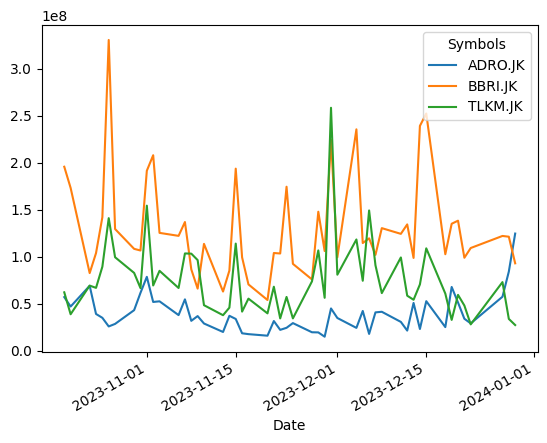

In [44]:
# membuat visualisasi dari 50 data Volume terakhir
stock_vol50.plot()

Dari visualisasi di atas:

* Sumbu x menunjukkan: nilai `Date`.
* Sumbu y menunjukkan: nilai `Volume`.
* Setiap garis mewakili perusahaan yang berbeda: `ADRO.JK`, `BBRI.JK`, dan `TLKM.JK`.    

📝 **Note**: Secara default, `.plot()` akan menghasilkan **Line Plot**

📈 ***Insight***:

- pergerakan penjualan saham ketiga saham cenderung fluktuatif
- Besar penjualan saham BBRI nilainya lebih tinggi
- Besar penjualan saham Adaro nilainya lebih rendah

Kita juga dapat mengatur _style_ dari visualisasi dengan fungsi `plt.style.use()`.

In [45]:
# style yang tersedia
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [46]:
# menggunakan style seaborn-v0_8
plt.style.use('seaborn-v0_8')

<Axes: xlabel='Date'>

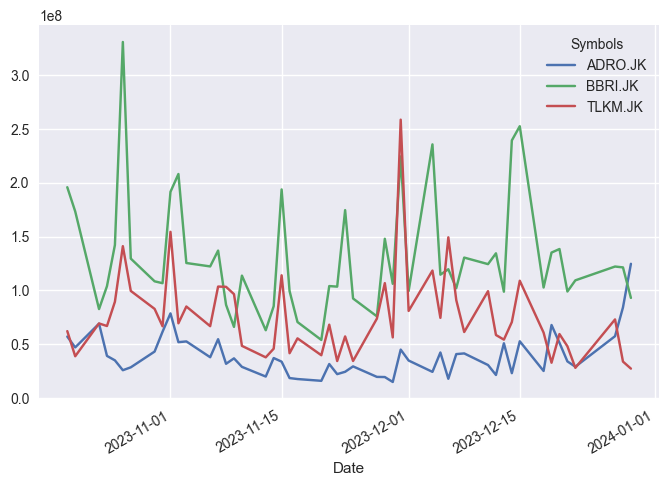

In [47]:
# visualisasi ulang setelah mengatur style
stock_vol50.plot()

> ❓ Berdasarkan sebelumnya, `ADRO.JK` adalah saham dengan angka volume yang cenderung terendah dibandingkan dengan dua perusahaannya. Selanjutnya, tim ingin membuat visualisasi pergerakan saham `ADRO.JK` selama tahun 2023.

In [48]:
stock.head()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700

In [49]:
# subsetting untuk mendapatkan atribut ADRO.JK selama 2023
adaro_2023 = stock.xs(
    key = 'ADRO.JK' ,
    level = 'Symbols' ,
    axis = 1
).loc[ '2023-01-01' : '2023-12-31' ,:]

adaro_2023

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-01-02,"2,769.70","3,590.00","3,650.00","3,590.00","3,610.00",69696600
2023-01-03,"2,715.70","3,520.00","3,590.00","3,500.00","3,590.00",95601300
2023-01-04,"2,545.97","3,300.00","3,560.00","3,300.00","3,540.00",163804600
2023-01-05,"2,391.66","3,100.00","3,270.00","3,080.00","3,250.00",225480200
2023-01-06,"2,422.52","3,140.00","3,190.00","3,090.00","3,090.00",133608100
...,...,...,...,...,...,...
2023-12-21,"2,223.55","2,600.00","2,610.00","2,570.00","2,580.00",34194600
2023-12-22,"2,215.00","2,590.00","2,610.00","2,580.00","2,600.00",29264900
2023-12-27,"2,215.00","2,590.00","2,630.00","2,580.00","2,600.00",57605200


<Axes: xlabel='Date'>

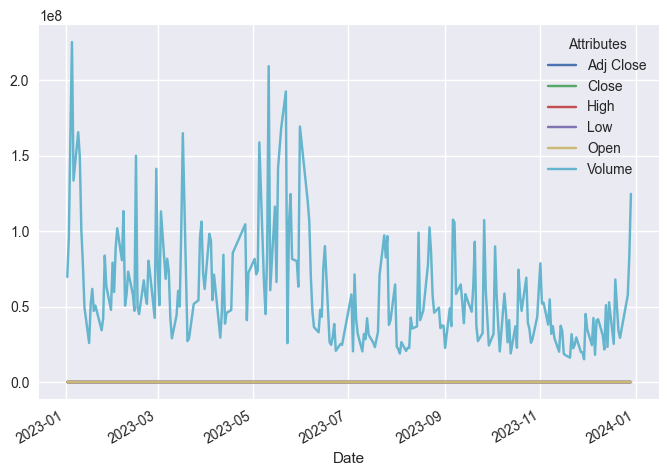

In [50]:
# visualisasi data adaro_2023
adaro_2023.plot()

💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat?

In [51]:
# cek distribusi data untuk adaro_2023
adaro_2023.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
count,239.00,239.00,239.00,239.00,239.00,239.00
mean,"2,200.66","2,680.59","2,726.36","2,647.62","2,688.91","60,091,664.44"
std,176.09,284.50,293.40,281.39,289.71,"37,351,427.85"
min,"1,744.63","2,040.00","2,090.00","2,010.00","2,070.00","15,113,600.00"
25%,"2,090.99","2,470.00","2,510.00","2,425.00","2,475.00","33,629,650.00"
50%,"2,206.50","2,680.00","2,730.00","2,650.00","2,700.00","50,051,200.00"
75%,"2,307.93","2,895.00","2,940.00","2,860.00","2,900.00","75,079,350.00"
max,"2,769.70","3,590.00","3,650.00","3,590.00","3,610.00","225,480,200.00"


In [52]:
# buat visualisasi dengan meng-exclude kolom Volume
adaro_2023 = adaro_2023.drop(columns='Volume')
adaro_2023

Attributes,Adj Close,Close,High,Low,Open
Date,,,,,
2023-01-02,"2,769.70","3,590.00","3,650.00","3,590.00","3,610.00"
2023-01-03,"2,715.70","3,520.00","3,590.00","3,500.00","3,590.00"
2023-01-04,"2,545.97","3,300.00","3,560.00","3,300.00","3,540.00"
2023-01-05,"2,391.66","3,100.00","3,270.00","3,080.00","3,250.00"
2023-01-06,"2,422.52","3,140.00","3,190.00","3,090.00","3,090.00"
...,...,...,...,...,...
2023-12-21,"2,223.55","2,600.00","2,610.00","2,570.00","2,580.00"
2023-12-22,"2,215.00","2,590.00","2,610.00","2,580.00","2,600.00"
2023-12-27,"2,215.00","2,590.00","2,630.00","2,580.00","2,600.00"


<Axes: xlabel='Date'>

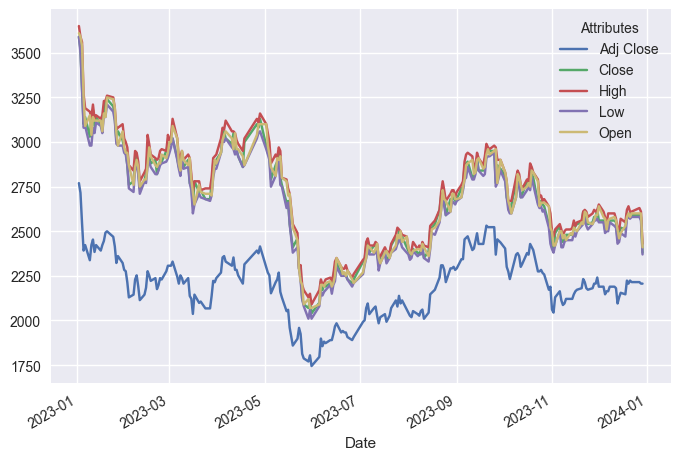

In [53]:
adaro_2023.plot()

**Quick Summary**

- **_Reshaping_**
  * `DataFrame.melt()` melebur beberapa kolom menjadi 1 kolom.
    * Parameter:
      * `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
      * `value_vars`: kolom yang akan dilebur.
  * `DataFrame.pivot()` menguraikan 1 kolom menjadi beberapa kolom.
    * Parameter:
      * `columns`: kolom yang akan diuraikan.
      * `index`: kolom yang dijadikan _index_.
      * `values`: kolom yang akan mengisi _value_ dari kolom yang baru dibuat.
- **Visualisasi**
  * _Exploratory vs Explanatory_
    - Visualisasi _exploratory_ digunakan untuk menemukan pola pada data (analisis pribadi).
    - Visualisasi _explanatory_ digunakan untuk mengomunikasikan _insight_ yang sudah didapatkan.
  * Fungsi untuk visualisasi dari _dataframe_: `.plot()`.

## ✨Tipe-Tipe Visualisasi✨

Perhatikan bahwa kita tidak memasukkan argumen apapun ke dalam fungsi `.plot()`. _By default_, jenis visualisasi yang digunakan adalah _lineplot_. Terdapat beberapa jenis visualisasi lain yang bisa kita gunakan.

* **Categorical Comparison**
	- **`.plot.bar()` untuk _bar plot_ (diagram batang)**.
	- **`.plot.barh()` untuk _horizontal bar plot_**.
	- `.plot.pie()` untuk _pie chart_.

* **Numerical Distribution**
    - **`.plot.hist()` untuk histogram**.
	- **`.plot.box()` untuk _box plot_**.

* **Time Series Evolution**
	- `.plot.line()` untuk _line plot_.

* **Correlation / Relationship**
	- `.plot.scatter()` untuk _scatter plot_.
	- `.plot.density()` untuk _density plot_.


> 📌 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/.

> 📌 Dokumentasi fungsi `.plot`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html.

### 1️⃣ Barplot

> 📌 **_Barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori**.

> ❓ Selanjutnya, tim ingin **membandingkan tingkat fluktuasi** nilai `High` pada masing-masing perusahaan menggunakan *coefficient of variation*. *Insight* yang didapatkan pada analisis ini dapat dimanfaatkan untuk mengurutkan perusahaan mana yang pergerakan sahamnya yang cukup stabil dan mana yang tidak.

> 📌 Info lebih lanjut terkait [coefficient of variation](https://www.investopedia.com/terms/c/coefficientofvariation.asp)

$$CoV = \frac{std}{mean}$$

In [54]:
stock['High'].std() 

Symbols
ADRO.JK   875.04
BBRI.JK   595.56
TLKM.JK   415.96
dtype: float64

In [55]:
stock['High'].mean() 

Symbols
ADRO.JK   2,483.61
BBRI.JK   4,574.03
TLKM.JK   3,919.29
dtype: float64

In [56]:
# mengambil nilai coefficient of variation
high_cov = stock['High'].std() / stock['High'].mean()
high_cov

Symbols
ADRO.JK   0.35
BBRI.JK   0.13
TLKM.JK   0.11
dtype: float64

<Axes: xlabel='Symbols'>

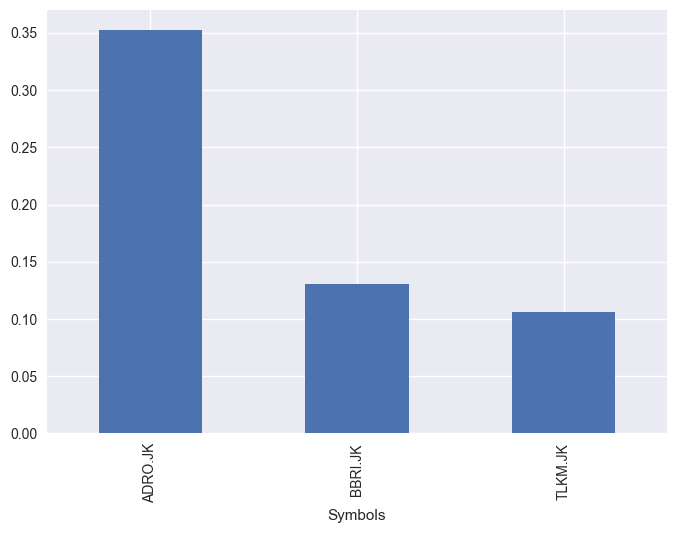

In [57]:
# membuat barplot 
high_cov.plot.bar()

📈 ***Insight***:

* ADRO paling fluktuatif diantara ketiga saham

### 2️⃣ Horizontal Barplot

> 📌 **_Horizontal barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori secara horizontal** .

<Axes: ylabel='Symbols'>

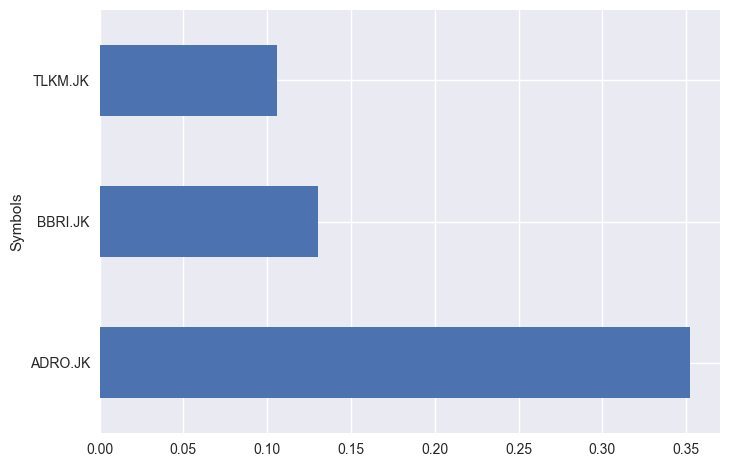

In [58]:
# membuat horizontal barplot dari data high_cov
high_cov.plot.barh()

In [59]:
# mengurutkan high_cov
high_cov = high_cov.sort_values()
high_cov

Symbols
TLKM.JK   0.11
BBRI.JK   0.13
ADRO.JK   0.35
dtype: float64

<Axes: ylabel='Symbols'>

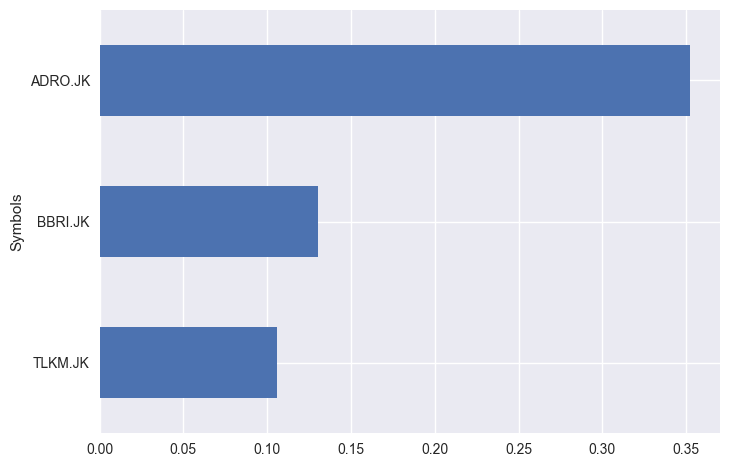

In [60]:
# membuat ulang horizontal barplot
high_cov.plot.barh()

🔎 ***Barplot vs Horizontal Barplot***

* _Barplot_ (Vertical): digunakan saat ingin membuat perbandingan yang sudah memiliki urutan, misalnya tingkat pendidikan dan waktu.
* _Horizontal barplot_: digunakan saat ingin melihat perbandingan berdasarkan _ranking_/besar nilai.

> ❓ Dengan contoh di atas, kita sebaiknya menggunakan Horizontal Barplot

### 3️⃣ Histogram

> 📌 **Histogram** digunakan untuk melihat **persebaran** data (numerik).

>❓ Berdasarkan hasil analisis sebelumnya, `TLKM.JK` adalah perusahaan yang CoV-nya paling kecil dibandingkan BRI dan Adaro. Selanjutnya, tim ingin melihat lebih lanjut, bagaimanakah **persebaran** `Volume` pada saham `TLKM.JK`?

In [61]:
stock.head()

Attributes Adj Close                      Close                       High  \
Symbols      ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK   
Date                                                                         
2021-01-04    884.01 3,286.69 2,898.68 1,455.00 3,918.11 3,490.00 1,460.00   
2021-01-05    865.79 3,256.18 2,882.07 1,425.00 3,881.75 3,470.00 1,470.00   
2021-01-06    835.41 3,202.80 2,799.01 1,375.00 3,818.12 3,370.00 1,420.00   
2021-01-07    853.63 3,263.81 2,815.62 1,405.00 3,890.84 3,390.00 1,430.00   
2021-01-08    877.94 3,347.69 2,965.12 1,445.00 3,990.84 3,570.00 1,485.00   

Attributes                        Low                       Open           \
Symbols     BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK  TLKM.JK  ADRO.JK  BBRI.JK   
Date                                                                        
2021-01-04 3,927.20 3,500.00 1,360.00 3,772.66 3,310.00 1,430.00 3,772.66   
2021-01-05 3,909.02 3,480.00 1,420.00 3,854.48 3,420.00 1,455.00 3,909.02   
2021-01-06 3,909.02 3,490.00 1,340.00 3,781.75 3,330.00 1,415.00 3,890.84   
2021-01-07 3,899.93 3,450.00 1,360.00 3,827.21 3,380.00 1,370.00 3,872.66   
2021-01-08 3,990.84 3,620.00 1,430.00 3,909.02 3,440.00 1,450.00 3,936.30   

Attributes              Volume                        
Symbols     TLKM.JK    ADRO.JK    BBRI.JK    TLKM.JK  
Date                                                  
2021-01-04 3,320.00  110366200  106226854  165339800  
2021-01-05 3,480.00  107023500  106964857  157800700  
2021-01-06 3,470.00  203948800  128299616  177877900  
2021-01-07 3,390.00  204243100  141798389  140221900  
2021-01-08 3,450.00  165263900  205011531  492643700

In [62]:
# ambil data Volume pada TLKM.JK dan simpan ke variabel vol_telkom
vol_telkom = stock['Volume']['TLKM.JK']
vol_telkom

Date
2021-01-04    165339800
2021-01-05    157800700
2021-01-06    177877900
2021-01-07    140221900
2021-01-08    492643700
                ...    
2023-12-21     48242100
2023-12-22     28222700
2023-12-27     73157200
2023-12-28     34024400
2023-12-29     27497600
Name: TLKM.JK, Length: 732, dtype: int64

<Axes: ylabel='Frequency'>

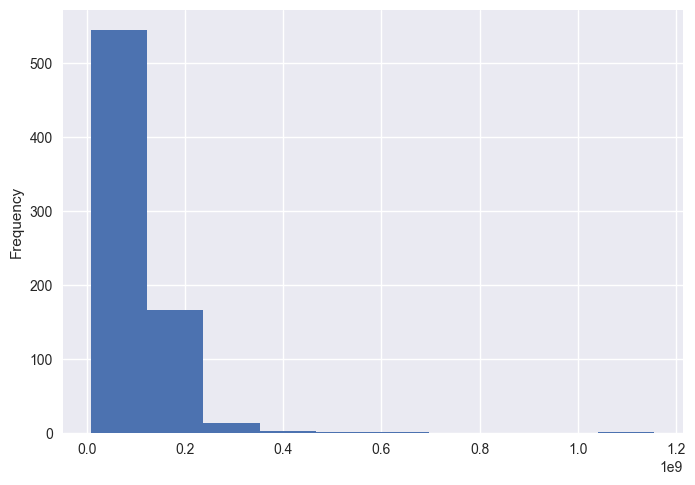

In [63]:
# visualisasi histogram 
vol_telkom.plot.hist()

Gunakan parameter `bins` untuk mengubah jumlah bin dalam histogram:

<Axes: ylabel='Frequency'>

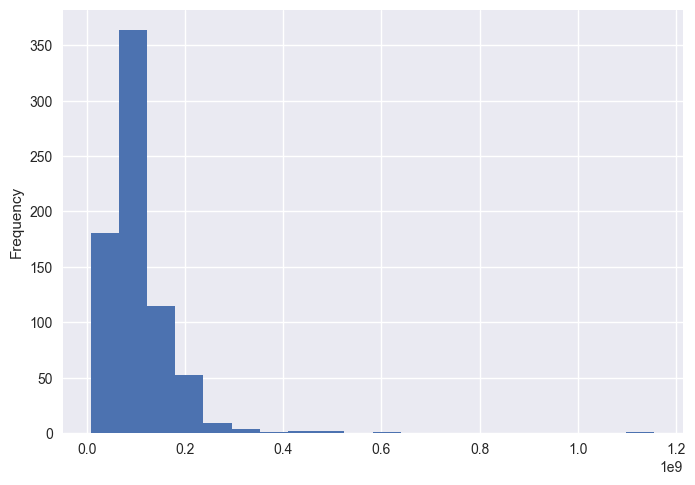

In [64]:
# Histogram dengan 20 bins
vol_telkom.plot.hist(bins=20)

📈 ***Insight***:

* Banyaknya transaksi untuk TLKM paling banyak jauh pada range ~50jt-100jt untuk tiap harinya

### 🧪 Knowledge Check: Barplot vs Histogram

Setelah mempelajari kedua jenis visualisasi di atas: _barplot_ dan histogram, apa perbedaan kedua visualisasi tersebut?
 - Berdasarkan tipe data : Histogram untuk sumbu x yang numeric, kalo barplot sumbu x nya kategori
 - Berdasarkan tujuan : histogram untuk melihat persebaran data sementara barplot untuk melihat ranking

### 4️⃣ Boxplot

> 📌 ***Boxplot*** digunakan untuk melihat ***5 number summary*** & **membandingkan persebaran** dari suatu nilai numerik.

<center>
<img src="assets/box_plot.png" width="600"/>
<center/>

- Q1: kuartil 1 (data ke 25%).
- Median: kuartil 2 (data ke 50%).
- Q3: kuartil 3 (data ke 75%).
- _Lower whisker_: pagar bawah.
- _Upper whisker_: pagar atas.
- Data di luar pagar akan dianggap sebagai _outlier_ atau data pencilan.

> ❓ Untuk mendapatkan *insight* yang lebih lengkap, tim ingin **membandingkan persebaran** untuk ketiga saham menggunakan *boxplot*.

<Axes: >

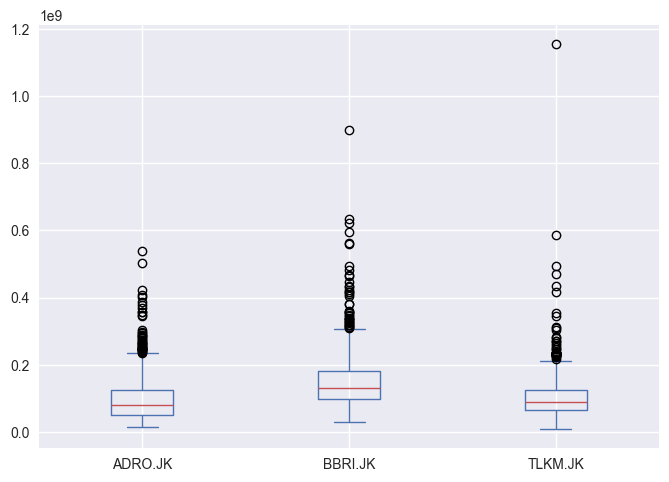

In [65]:
# menampilan boxplot untuk membandingkan persebaran Volume dari ketiga saham
stock['Volume'].plot.box()

Gunakan parameter `vert=False` untuk melihat _boxplot_ secara horizontal.

<Axes: >

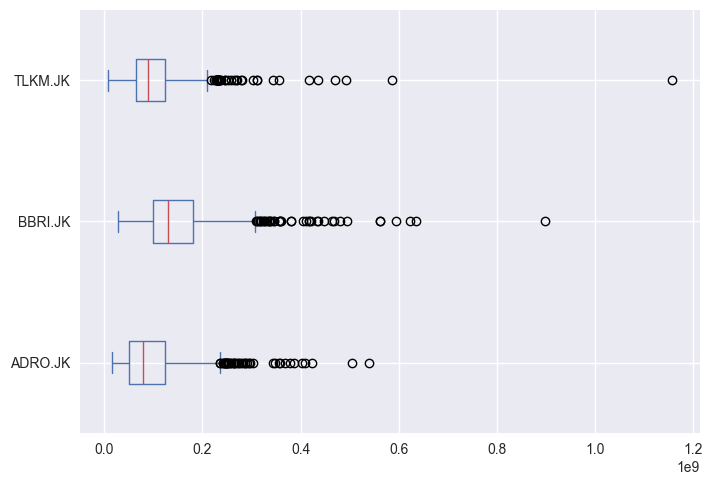

In [66]:
# horizontal box plot
stock['Volume'].plot.box(vert=False)

📈 ***Insight***:

* ada data outlier diluar pagar u/ masing-masing saham
* berdasarkan median, saham yang jumlah transaksi paling tinggi adalah BBRI

<Axes: >

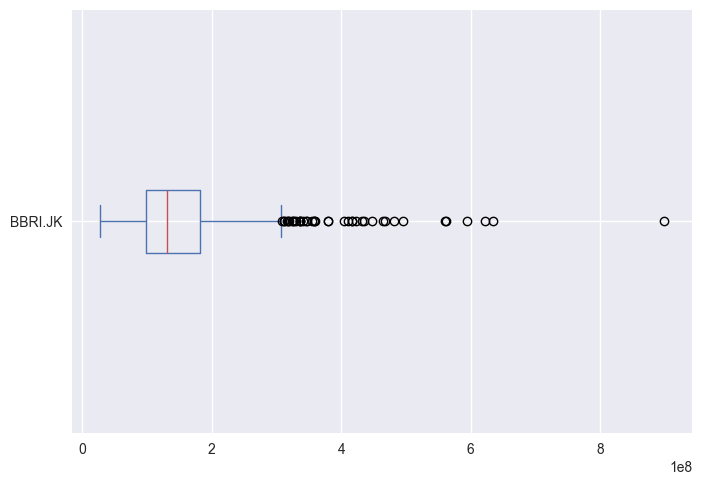

In [67]:
stock['Volume']['BBRI.JK'].plot.box(vert=False)

In [68]:
stock['Volume']['BBRI.JK'].describe()

count           732.00
mean    153,239,150.59
std      87,445,586.29
min      27,676,500.00
25%      98,396,769.00
50%     130,060,950.00
75%     181,772,650.00
max     898,453,700.00
Name: BBRI.JK, dtype: float64

> ❓ Tim diminta perusahaan untuk membandingkan distribusi `Volume` dari `BBRI.JK` setiap quarter tahun 2023. Tampilkan dalam bentuk box plot!

In [69]:
# ambil data Volume BBRI.JK
vol_bri = stock['Volume'][['BBRI.JK']].loc['2023-01-01':'2023-12-31'].copy()
vol_bri.head()

Symbols,BBRI.JK
Date,
2023-01-02,100200100
2023-01-03,95136500
2023-01-04,188071000
2023-01-05,292142000
2023-01-06,175932000


In [70]:
vol_bri = vol_bri.reset_index() # Mengubah kolom Date dari index menjadi sebuah kolom
vol_bri

Symbols,Date,BBRI.JK
0,2023-01-02,100200100
1,2023-01-03,95136500
2,2023-01-04,188071000
3,2023-01-05,292142000
4,2023-01-06,175932000
...,...,...
234,2023-12-21,99049600
235,2023-12-22,109411300
236,2023-12-27,122236700
237,2023-12-28,121434600


In [71]:
vol_bri['Date'].dt.to_period('Q') # Mengekstrak komponen Quarter dari kolom Date

0      2023Q1
1      2023Q1
2      2023Q1
3      2023Q1
4      2023Q1
        ...  
234    2023Q4
235    2023Q4
236    2023Q4
237    2023Q4
238    2023Q4
Name: Date, Length: 239, dtype: period[Q-DEC]

In [72]:
# buat kolom baru, Quarter, yang menunjukkan kuarter dari waktu yang diberikan 
vol_bri['Quarter'] = vol_bri['Date'].dt.to_period('Q')
vol_bri

Symbols,Date,BBRI.JK,Quarter
0,2023-01-02,100200100,2023Q1
1,2023-01-03,95136500,2023Q1
2,2023-01-04,188071000,2023Q1
3,2023-01-05,292142000,2023Q1
4,2023-01-06,175932000,2023Q1
...,...,...,...
234,2023-12-21,99049600,2023Q4
235,2023-12-22,109411300,2023Q4
236,2023-12-27,122236700,2023Q4
237,2023-12-28,121434600,2023Q4


Gunakan parameter `by='NAMA_KOLOM'` untuk memisahkan boxplot berdasarkan suatu kolom category:

BBRI.JK    Axes(0.125,0.11;0.775x0.77)
dtype: object

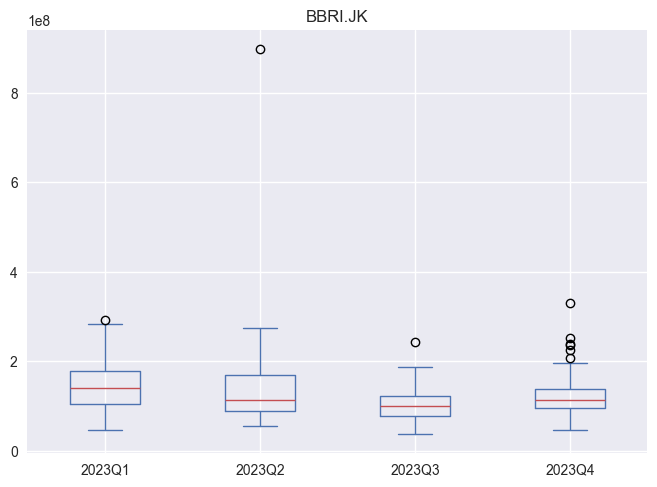

In [73]:
# visualisasi
vol_bri.plot.box(by='Quarter')

📈 ***Insight***:

- Berdasarkan nilai median: saham yang jumlah transaksi paling tinggi di perusahaan BRI berada di 2023Q1.
- Berdasarkan lebar box: 2023Q2 memiliki persebaran jumlah transaksi yang besar
- Berdasarkan outlier: Q4 terdapat lebih banyak outlier dibanding Quarter lain
- Berdasarkan nilai maksimum: transaksi terbanyak terjadi pada 2023Q2

### (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silakan eksplorasi lebih lanjut _package_-_package_ berikut.

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan _code_ yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`. Lebih sedikit yang dapat dikustomisasi, namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif dan _code_ relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan _library_ dapat Anda lihat [di sini](https://askalgo-py.netlify.app/faq/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib).

---

# Aggregation Visualization

Misalkan kita punya *dataframe* `close_melted` yang menyimpan data `Close` harian dari setiap perusahaan.

In [74]:
# membuat dataframe close_melted
close_melted  = stock['Close'].reset_index().melt(id_vars = 'Date', 
                                                  var_name = 'Symbols',
                                                  value_name='Close')
close_melted

,Date,Symbols,Close
0,2021-01-04,ADRO.JK,"1,455.00"
1,2021-01-05,ADRO.JK,"1,425.00"
2,2021-01-06,ADRO.JK,"1,375.00"
3,2021-01-07,ADRO.JK,"1,405.00"
4,2021-01-08,ADRO.JK,"1,445.00"
...,...,...,...
2191,2023-12-21,TLKM.JK,"3,950.00"
2192,2023-12-22,TLKM.JK,"3,960.00"
2193,2023-12-27,TLKM.JK,"3,940.00"
2194,2023-12-28,TLKM.JK,"3,960.00"


> ❓ Untuk melengkapi analisis sebelumnya, tim ingin membandingkan, di antara `ADRO.JK`, `BBRI.JK`,  dan `TLKM.JK`, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi? 

Untuk menyelesaikan *case* di atas, minggu lalu kita telah mempelajari metode pembuatan metode tabel agregasi. Buatlah tabel agregasi dengan `pd.crosstab()` atau `.pivot_table()`!

In [75]:
# code here
close_melted.pivot_table(
            index = 'Symbols',
            values = 'Close',
            aggfunc = 'mean'
)

,Close
Symbols,
ADRO.JK,"2,440.12"
BBRI.JK,"4,526.34"
TLKM.JK,"3,878.74"


In [76]:
pd.crosstab(
    index = close_melted['Symbols'],
    columns = 'Rata-rata',
    values= close_melted['Close'],
    aggfunc= 'mean'
)

col_0,Rata-rata
Symbols,
ADRO.JK,"2,440.12"
BBRI.JK,"4,526.34"
TLKM.JK,"3,878.74"


Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `.crosstab()` | `.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

Selain menggunakan `pd.crosstab()` atau `.pivot_table`, salah satu fungsi yang dapat dimanfaatkan untuk melakukan agregasi data adalah method `.groupby()`.

### `.groupby()`

Proses agregasi menggunakan **group by** merupakan gabungan dari proses:

1. **Split**: memisahkan baris berdasarkan suatu kategori, contoh: dikelompokkan berdasarkan `format`
2. **Apply**: menerapkan fungsi agregasi untuk masing-masing grup, contoh: dihitung `mean` untuk masing-masing `format`
3. **Combine**: mengembalikan hasil dalam bentuk 1 tabel

```python
df.groupby('kolom_category').aggfunc()
```

atau

```python
df.groupby('kolom_category')['kolom_numerik'].aggfunc()
```

💡 Berikut beberapa fungsi agregasi yang dapat digunakan pada `pandas`:

- `.count()`- Jumlah baris
- `.sum()` - Penjumlahan
- `.mean()` - Rata-rata 
- `.median()` - Median
- `.min()` - Minimum
- `.max()` - Maximum
- `.mode()` - Modus
- `.std()` - Standard Deviasi
- `.var()`- Variansi

> ❓ Gunakan `.groupby()` untuk menganalisis saham yang memiliki **rata-rata** `Close` harian tertinggi? 

In [77]:
# code here
close_melted.groupby('Symbols').mean()

,Date,Close
Symbols,,
ADRO.JK,2022-06-30 15:44:15.737704960,"2,440.12"
BBRI.JK,2022-06-30 15:44:15.737704960,"4,526.34"
TLKM.JK,2022-06-30 15:44:15.737704960,"3,878.74"


💡 **Note**:

Gunakan parameter `numeric_only=True` agar fungsi agregasi hanya menghitung kolom numerik saja. 

In [78]:
# code here
close_melted.groupby('Symbols').mean(numeric_only=True)

,Close
Symbols,
ADRO.JK,"2,440.12"
BBRI.JK,"4,526.34"
TLKM.JK,"3,878.74"


Jika kita tidak ingin melakukan agregasi pada seluruh kolom, maka lakukan subsetting menggunakan kurung siku (`['nama_kolom']`) terlebih dahulu setelah dilakukan `.groupby()`

In [79]:
# code here
close_mean = close_melted.groupby('Symbols')['Close'].mean().sort_values()
close_mean

Symbols
ADRO.JK   2,440.12
TLKM.JK   3,878.74
BBRI.JK   4,526.34
Name: Close, dtype: float64

Selanjutnya, buat visualisasi dengan *barchart*.

<Axes: title={'center': 'Rata-Rata harga saham ketika Closing'}, xlabel='Harga Saham (Rp)', ylabel='Symbols'>

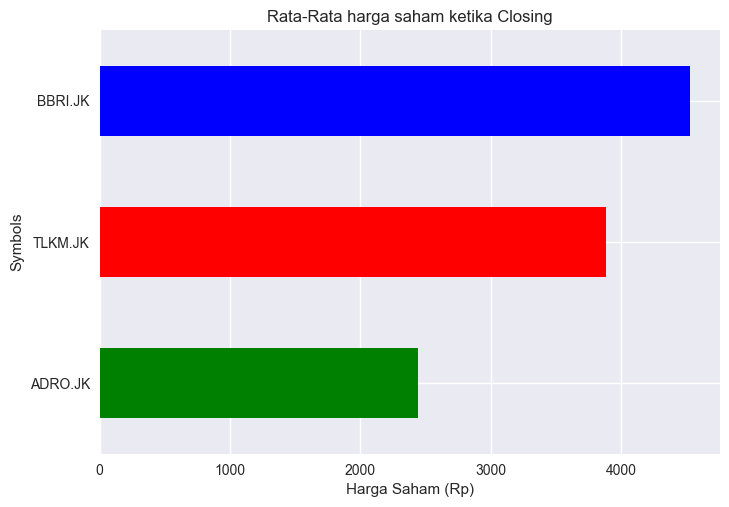

In [80]:
# code here
close_mean.plot.barh(title = 'Rata-Rata harga saham ketika Closing',
                     color = ['green', 'red', 'blue'],
                     xlabel = 'Harga Saham (Rp)' )

**Quick Summary**

- **Visualisasi**
  * _Barplot_
    - Digunakan untuk membandingkan beberapa kategori terhadap variabel numerik.
    - Sintaks: `DataFrame.plot(kind = 'bar')` atau `DataFrame.plot(kind = 'barh')`.
  * _Histogram_
    - Digunakan untuk melihat distribusi data.
    - Sintaks: `DataFrame.plot(kind = 'hist')`.
  * _Boxplot_
    - Digunakan untuk melihat distribusi data dan nilai statistik data.
    - Sintaks: `DataFrame.plot(kind = 'box')`.
  * Parameter tambahan untuk `.plot()`:
    - `title` untuk memberi judul plot.
    - `xlabel` untuk memberi label pada sumbu x.
    - `ylabel` untuk memberi label pada sumbu y.
    - `color` untuk mengganti warna plot.
    - `rot` untuk memutar tulisan pada sumbu.
- **Agregasi dengan `.groupby()`**
  * Penggunaannya mirip dengan `pd.crosstab()` dan `DataFrame.pivot_table()`.
  * Sintaks: `DataFrame.groupby(by = 'kolom untuk agregasi').agg_func()`.

## ✨Grouped Barchart✨

> ❓ Jika pada analisis sebelumnya tim hanya menghitung rata-rata nilai `Close` secara keseluruhan, kali ini, mereka ingin membuat visualisasi yang dapat membandingkan rata-rata nilai `Close` untu ketiga saham setiap bulannya. 

Untuk *case* di atas, kita bisa menggunakan ***grouped barchart***.

* Buatlah *dataframe*  `closing_price` yang berisikan nilai `Close` untuk ketiga saham.
* Tampilkan nilai rata-rata `Close` untuk setiap bulannya pada tabel agregasi `mean_closing`.

In [81]:
# buat dataframe closing_price
closing_price = stock['Close'].copy()
closing_price.head()

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2021-01-04,"1,455.00","3,918.11","3,490.00"
2021-01-05,"1,425.00","3,881.75","3,470.00"
2021-01-06,"1,375.00","3,818.12","3,370.00"
2021-01-07,"1,405.00","3,890.84","3,390.00"
2021-01-08,"1,445.00","3,990.84","3,570.00"


In [82]:
closing_price.index.month_name() # Mengambil atribut bulan dari index (Date) - Cara 1

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=732)

In [83]:
closing_price.reset_index()['Date'].dt.month_name() # Mengambil atribut bulan dari index (Date) - Cara 2

0       January
1       January
2       January
3       January
4       January
         ...   
727    December
728    December
729    December
730    December
731    December
Name: Date, Length: 732, dtype: object

In [84]:
# buat kolom baru pada closing_price: Month
closing_price['Month'] = closing_price.index.month_name() # Menyimpan atribut bulan dari index (Date) ke kolom baru (Month)
closing_price

Symbols,ADRO.JK,BBRI.JK,TLKM.JK,Month
Date,,,,
2021-01-04,"1,455.00","3,918.11","3,490.00",January
2021-01-05,"1,425.00","3,881.75","3,470.00",January
2021-01-06,"1,375.00","3,818.12","3,370.00",January
2021-01-07,"1,405.00","3,890.84","3,390.00",January
2021-01-08,"1,445.00","3,990.84","3,570.00",January
...,...,...,...,...
2023-12-21,"2,600.00","5,575.00","3,950.00",December
2023-12-22,"2,590.00","5,675.00","3,960.00",December
2023-12-27,"2,590.00","5,625.00","3,940.00",December


In [85]:
# buat tabel agregasi mean_closing
monthly_closing = closing_price.groupby('Month').mean()
monthly_closing

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Month,,,
April,"2,357.50","4,435.75","4,019.63"
August,"2,400.08","4,519.24","3,901.72"
December,"2,812.78","4,810.40","3,930.79"
February,"2,116.49","4,466.20","3,810.35"
January,"2,296.29","4,304.65","3,834.19"
July,"2,201.85","4,381.24","3,716.61"
June,"2,222.54","4,466.16","3,825.08"
March,"2,287.54","4,546.90","3,975.69"
May,"2,289.15","4,529.92","3,859.43"


In [86]:
monthly_closing = closing_price.pivot_table(
    index = 'Month',
    values = ['ADRO.JK', 'BBRI.JK', 'TLKM.JK'],
    aggfunc = 'mean'
)
monthly_closing

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Month,,,
April,"2,357.50","4,435.75","4,019.63"
August,"2,400.08","4,519.24","3,901.72"
December,"2,812.78","4,810.40","3,930.79"
February,"2,116.49","4,466.20","3,810.35"
January,"2,296.29","4,304.65","3,834.19"
July,"2,201.85","4,381.24","3,716.61"
June,"2,222.54","4,466.16","3,825.08"
March,"2,287.54","4,546.90","3,975.69"
May,"2,289.15","4,529.92","3,859.43"


Selanjutnya, kita akan membuat *grouped barchart*.

<Axes: xlabel='Month'>

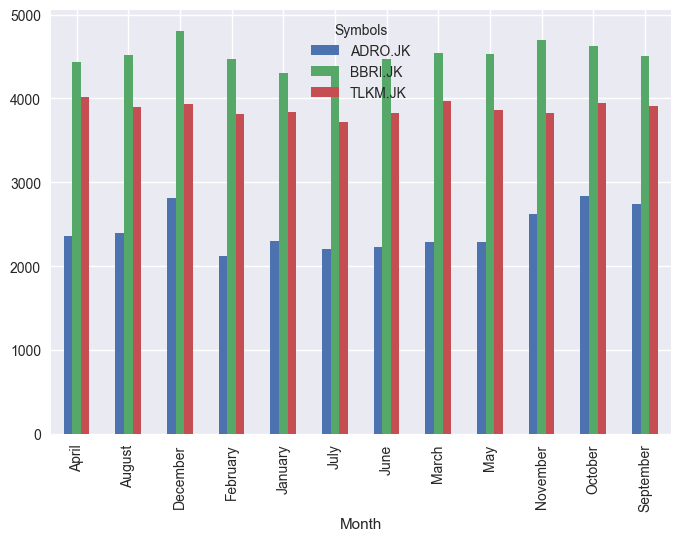

In [87]:
# code here
monthly_closing.plot.bar()

**Additional**: Sorting Month Name

Secara default, `pandas` akan mengurutkan bulan berdasarkan urutan alphabetical. Untuk mengurutkan urutan bulan sesuai dengan urutan pada kalender, kita perlu mendefinisikan sebuah list berisi nama-nama bulan dengan urutan yang tepat dan menggunakan method `.reindex()`

In [88]:
# improvement visualisasi
# perbaiki urutan bulan
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_closing = monthly_closing.reindex(months)
monthly_closing

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Month,,,
January,"2,296.29","4,304.65","3,834.19"
February,"2,116.49","4,466.20","3,810.35"
March,"2,287.54","4,546.90","3,975.69"
April,"2,357.50","4,435.75","4,019.63"
May,"2,289.15","4,529.92","3,859.43"
June,"2,222.54","4,466.16","3,825.08"
July,"2,201.85","4,381.24","3,716.61"
August,"2,400.08","4,519.24","3,901.72"
September,"2,737.66","4,504.32","3,904.69"


<Axes: xlabel='Month'>

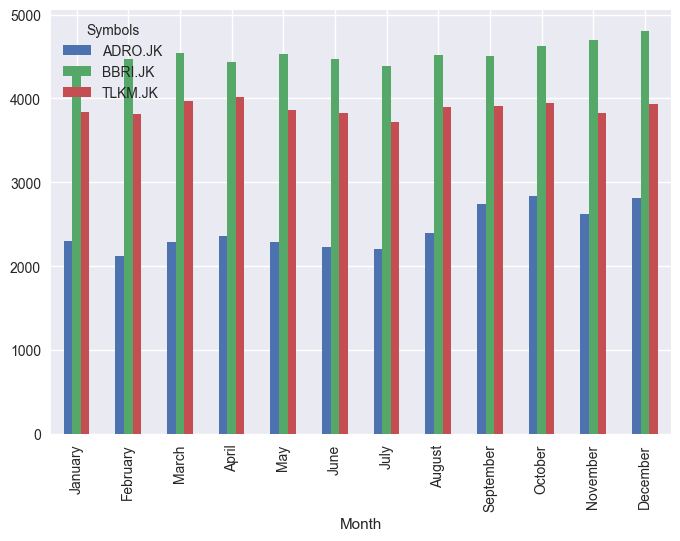

In [89]:
monthly_closing.plot.bar()

📈 ***Insight***:

* ADRO.JK memiliki rata-rata terbesar pada bulan Oktober
* BRI pada bulan December memiliki nilai paling besar

### 🧪 Knowledge Check: `.groupby()`

Tim dihadapi sebuah *long dataframe* seperti pada `closing_melt` berikut.

In [90]:
closing_melt = closing_price.melt(id_vars='Month', value_name='Close')
closing_melt

,Month,Symbols,Close
0,January,ADRO.JK,"1,455.00"
1,January,ADRO.JK,"1,425.00"
2,January,ADRO.JK,"1,375.00"
3,January,ADRO.JK,"1,405.00"
4,January,ADRO.JK,"1,445.00"
...,...,...,...
2191,December,TLKM.JK,"3,950.00"
2192,December,TLKM.JK,"3,960.00"
2193,December,TLKM.JK,"3,940.00"
2194,December,TLKM.JK,"3,960.00"


Untuk membuat sebuah grouped bar chart, tim harus mengubah bentuk dari dataframe tersebut. Bagaimana cara kita mengubah bentuk `closing_melt` menjadi `monthly_closing`?

***Hint:*** Gunakan teknik _group by_ dan juga _reshaping_.

<Axes: xlabel='Month'>

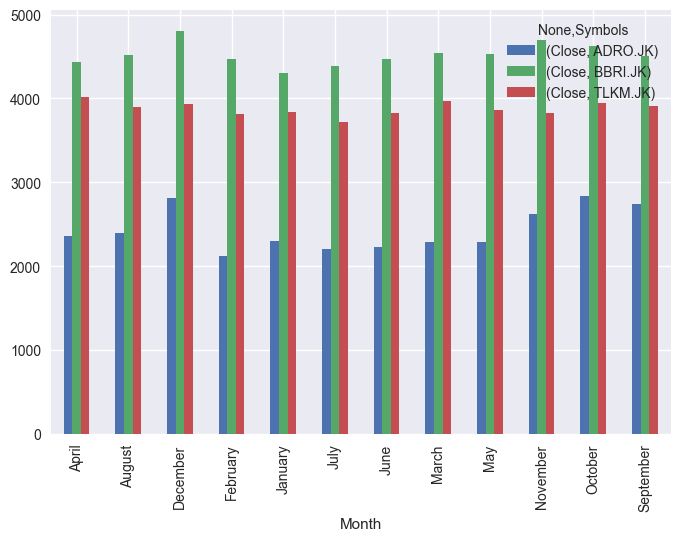

In [91]:
# code here - cara 1
closing_melt.groupby(['Month','Symbols']).mean('Close').unstack().plot.bar()

In [92]:
# code here - cara 2
closing_melt.groupby(['Month','Symbols']).mean('Close').reset_index().pivot(
    index = 'Month',
    columns = 'Symbols',
    values = 'Close'
)

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Month,,,
April,"2,357.50","4,435.75","4,019.63"
August,"2,400.08","4,519.24","3,901.72"
December,"2,812.78","4,810.40","3,930.79"
February,"2,116.49","4,466.20","3,810.35"
January,"2,296.29","4,304.65","3,834.19"
July,"2,201.85","4,381.24","3,716.61"
June,"2,222.54","4,466.16","3,825.08"
March,"2,287.54","4,546.90","3,975.69"
May,"2,289.15","4,529.92","3,859.43"


## ✨Combining `.agg()` and `.groupby()`✨

Pada bagian sebelumnya, kita sudah mengetahui bahwa penggunaan `.groupby()` diikuti dengan sebuah fungsi agregasi. Misalnya, jika ingin menghitung rata-rata, maka kita menggunakan `.mean()`. Terdapat fungsi lain, `.agg()` yang memungkinkan kita untuk menggunakan fungsi agregasi yang berbeda-beda.

Misalkan terdapat memiliki data `stock_long` sebagai berikut.

In [93]:
stock_long = stock.stack().reset_index()
stock_long.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2021-01-04,ADRO.JK,884.01,"1,455.00","1,460.00","1,360.00","1,430.00",110366200
1,2021-01-04,BBRI.JK,"3,286.69","3,918.11","3,927.20","3,772.66","3,772.66",106226854
2,2021-01-04,TLKM.JK,"2,898.68","3,490.00","3,500.00","3,310.00","3,320.00",165339800
3,2021-01-05,ADRO.JK,865.79,"1,425.00","1,470.00","1,420.00","1,455.00",107023500
4,2021-01-05,BBRI.JK,"3,256.18","3,881.75","3,909.02","3,854.48","3,909.02",106964857


❓ Jika pada analisis sebelumnya tim hanya terfokus pada satu kolom, kali ini, mereka ingin membandingkan beberapa aspek berikut dari ketiga perusahaan:

- Harga maksimum dari `High` untuk ketiga perusahaan (`max` dari `High`)
- Harga minimum dari `Low` untuk ketiga perusahaan  (`min` dari `Low`)
- Rata-rata *closing price* untuk ketiga perusahaan (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan _chaining_ `.groupby()` dengan method `.agg()`. Kita harus menyertakan _mapping_ (*dictionary*) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini:

```python
df.groupby('kolom_category').agg({'kolom_numerik1' : 'aggfunc1',
                                  'kolom_numerik2' : 'aggfunc2'})
```

Dictionary = Pasangan key dan value, syntax:

```python
dict = {'key':'value'}
```

In [94]:
biodata = {'nama':'arkana',
           'umur':23 }
biodata['umur']

23

In [95]:
# code here
summary_stock = stock_long.groupby('Symbols').agg( {'High' : 'max',
                                                    'Low' : 'min',
                                                    'Close' : 'mean'} )
summary_stock

Attributes,High,Low,Close
Symbols,,,
ADRO.JK,"4,250.00","1,150.00","2,440.12"
BBRI.JK,"5,750.00","3,363.58","4,526.34"
TLKM.JK,"4,850.00","3,000.00","3,878.74"


Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut.

<Axes: ylabel='Symbols'>

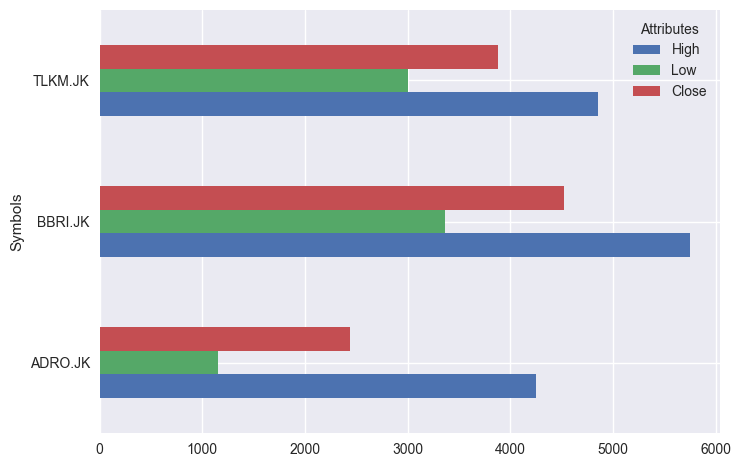

In [96]:
summary_stock.plot.barh()

## 🧪 Knowledge Check: Visualization

Perhatikan _dataframe_ `monthly_closing` berikut.

In [97]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
YearMonth,,,
2021-01,"1,390.00","4,149.93","3,421.00"
2021-02,"1,197.89","4,197.54","3,276.32"
2021-03,"1,214.55","4,249.93","3,399.55"
2021-04,"1,199.76","3,856.21","3,310.48"
2021-05,"1,187.94","3,645.93","3,239.41"
2021-06,"1,267.14","3,740.63","3,368.57"
2021-07,"1,260.71","3,477.00","3,141.43"
2021-08,"1,314.25","3,536.30","3,352.00"
2021-09,"1,422.73","3,665.98","3,461.82"


<Axes: xlabel='YearMonth'>

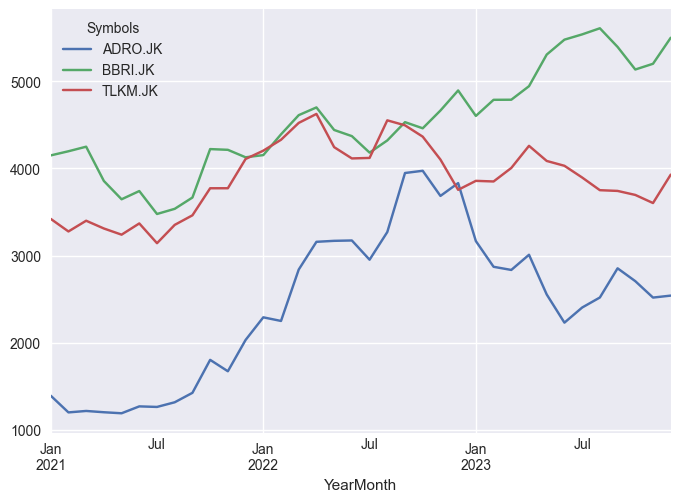

In [98]:
monthly_closing.plot.line()

Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [X] _Line plot_ `.plot()`
- [ ] _Scatter plot_ `.plot.scatter(x, y)` --- relasi atau hubungan variabel.
- [ ] _Bar plot_ `.plot.bar()` -- _ranking_/perbandingan kategori.
- [ ] _Box plot_ `.plot.box()` -- persebaran/distribusi data, nilai statistiknya (min, max, Q1, Q2, Q3, _outlier_).

---

**Quick Summary**

- ***Grouped Barchart***
  * _Barchart_ dengan beberapa _bar_ untuk setiap kategori.
  * Langkah membuat _grouped barchart_:
    1. Dari data yang _long_, buat tabel agregasi.
    2. Gunakan `.plot(kind = "bar")` atau `.plot(kind = "barh")`. _Grouped barchart_ akan otomatis terbentuk jika untuk satu baris ada beberapa kolom.
- **Custom Aggregation with `.agg()`**
  * Sintaks: `DataFrame.groupby(by = 'kolom untuk agregasi').agg({
    'kolom1': 'fungsi_agg_kolom1',
    'kolom2: 'fungsi_agg_kolom2',
    dst..
  })`.

# Inclass Questions

1. (Pak Alli) bisa nggak ya antar bin diberikan jarak supaya lebih jelas

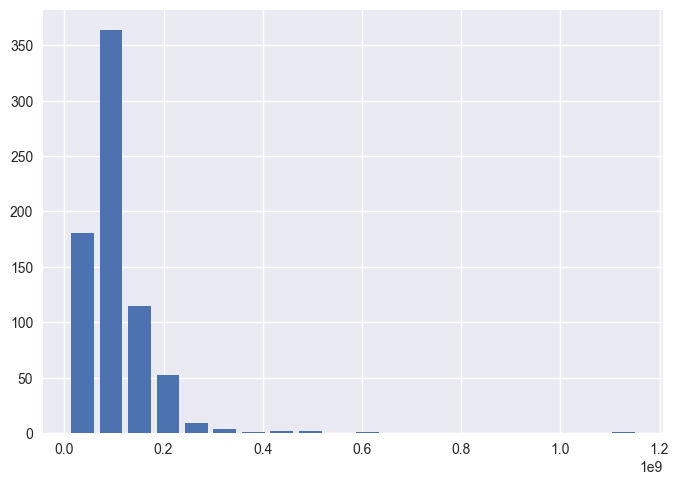

In [99]:
plt.hist(stock['Volume']['TLKM.JK'], bins=20, rwidth=0.8) 
plt.show()

2. (Ibu Renatha) Jika bar nya stacked gimana?

<Axes: xlabel='Symbols'>

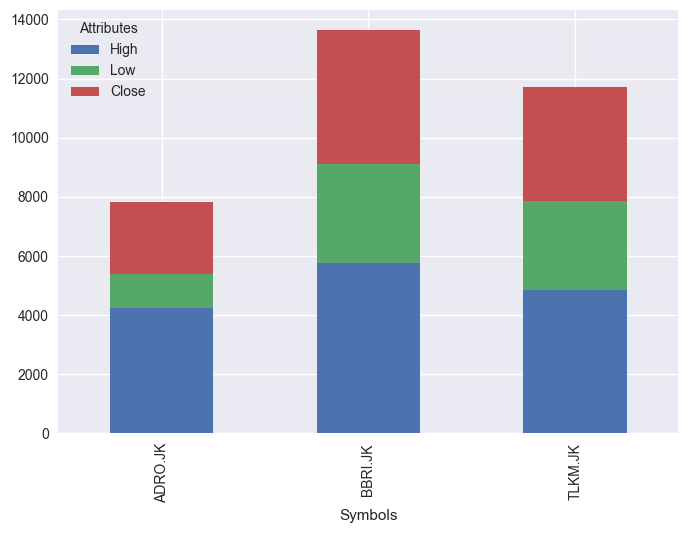

In [100]:
summary_stock.plot.bar(stacked=True) # Menggunakan parameter stacked

3. (Ibu Syifani) Bagaimana jika ingin custom warna gradasi yg bergantung dg urutan nilainya?

Sayangnya, pandas tidak memiliki fitur untuk mengubah warna gradasi berdasarkan urutan nilai. Parameter yang paling mirip hanyalah parameter `colormap` yang dapat mengubah warna untuk setiap kolom pada dataframe (hanya berlaku jika grouped).

🌐 Dokumentasi Pilihan Warna pada colormap : https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: ylabel='Symbols'>

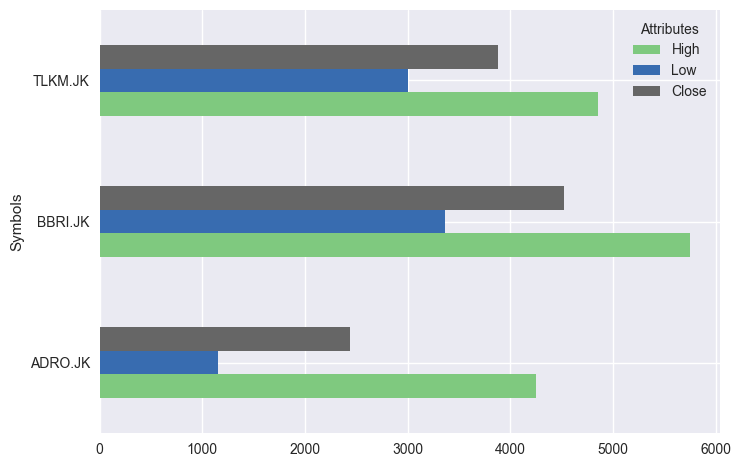

In [101]:
summary_stock.plot.barh(colormap='Accent')

Namun, terdapat beberapa fungsi custom dari matplotlib yang dapat digunakan untuk membuat gradasi

<BarContainer object of 5 artists>

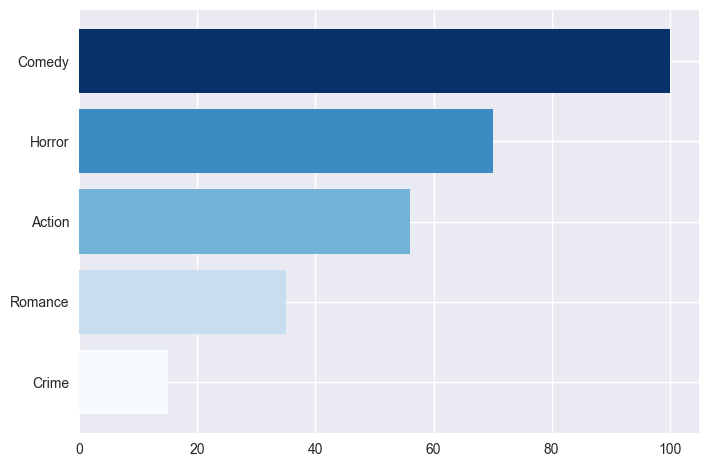

In [119]:
# Sample data
categories = ['Crime', 'Romance', 'Action', 'Horror', 'Comedy']
values = [15, 35, 56, 70, 100]

# Normalize the data to match the range of the colormap
norm = plt.Normalize(min(values), max(values))
# Choose a colormap (e.g., 'Blues')
cmap = plt.cm.Blues
# Map the normalized data to the colormap
colors = cmap(norm(values))

# Create the bar plot
plt.barh(categories, values, color=colors)

# Referensi

* Dokumentasi per Fungsi 
    * [Dokumentasi `.xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)
    * [Dokumentasi `.stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)
    * [Dokumentasi `.unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
    * [Dokumentasi `.pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    * [Dokumentasi `.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* Dokumentasi Resmi
    * [Pandas](https://pandas.pydata.org/)
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    * [Plotly](https://plotly.com/)
    * [Altair](https://altair-viz.github.io/)
* From Algoritma
    * [AskAlgo Python](https://askalgo-py.netlify.app/)